In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#import missingno as msno
import statsmodels.api as sm
#import tensorflow as tf
#imp
df = pd.read_csv(r"C:\Users\Hamza\Desktop\P2P ortak dosya\Makine Öğrenmesi\Solar1\solar_predict.xls")   #dataframe determined
df.columns=["Date","Time","Power","Load","Temp"]   #the columns in our dataframe
from datetime import datetime
from pytz import timezone
import pytz
df.index=df.iloc[:,0]
df.index = pd.to_datetime(df.index)  #convert to date
df.drop(['Load'], axis=1, inplace=True)   #I will just look at PV Generation
df['MonthOfYear'] = df.index.strftime('%m').astype(int)
df['DayOfYear'] = df.index.strftime('%j').astype(int)
df['WeekOfYear'] = df.index.strftime('%U').astype(int)
df.index=df.iloc[:,1]
df.index = pd.to_datetime(df.index)
df['TimeOfDay'] = df.index.hour
from pytz import timezone
from sklearn import preprocessing
from sklearn import model_selection
from sklearn import neighbors
from bokeh.plotting import figure, output_notebook, show
from bokeh.models import Range1d
#from tensorflow.keras.layers import Dense,Activation,Dropout
#from tensorflow.keras.models import Sequential,load_model
#from tensorflow.keras.optimizers import SGD, Adam
#from tensorflow.keras.models import Sequential
from collections import Counter
from scipy import stats
from sklearn.linear_model import LinearRegression, BayesianRidge, Ridge ,Lasso ,ElasticNet, LassoLarsIC
from sklearn.linear_model import RidgeCV, LassoCV, ElasticNetCV
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import KFold,RandomizedSearchCV
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler, scale, LabelEncoder  
from sklearn.impute import SimpleImputer
from sklearn.dummy import DummyRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor 
from sklearn.svm import SVR
#from catboost import CatBoostRegressor
#from lightgbm import LGBMRegressor
#from xgboost import XGBRegressor
from warnings import filterwarnings
filterwarnings('ignore')
df = pd.read_csv(r"C:\Users\Hamza\Desktop\P2P ortak dosya\Makine Öğrenmesi\Solar1\solar_predict.xls")   #dataframe determined
df.columns=["Date","Time","Power","Load","Temp"]   #the columns in our dataframe
from datetime import datetime
from pytz import timezone
import pytz
df.index=df.iloc[:,0]
df.index = pd.to_datetime(df.index)  #convert to date
df.drop(['Load'], axis=1, inplace=True)   #I will just look at PV Generation
df['MonthOfYear'] = df.index.strftime('%m').astype(int)
df['DayOfYear'] = df.index.strftime('%j').astype(int)
df['WeekOfYear'] = df.index.strftime('%U').astype(int)
df.index=df.iloc[:,1]
df.index = pd.to_datetime(df.index)
df['TimeOfDay'] = df.index.hour

# Gradient Boosting

In [6]:
X = df[['MonthOfYear', 'DayOfYear', 'WeekOfYear',"TimeOfDay","Temp"]]
y = df.iloc[:,2:3]
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)
gbm_model = GradientBoostingRegressor().fit(X_train, y_train)
y_pred = gbm_model.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

0.23524972470655597

In [7]:
gbm_model = GradientBoostingRegressor().fit(X_train, y_train)
gbm_params = {"learning_rate": [0.001,0.1,0.01],
             "max_depth": [3,5,8],
             "n_estimators": [100,200,500],
             "subsample": [1,0.5,0.8],
             "loss": ["ls","lad","quantile"]}
gbm_model = GradientBoostingRegressor().fit(X_train, y_train)

In [8]:
gbm_cv_model = GridSearchCV(gbm_model, 
                            gbm_params, 
                            cv = 10, 
                            verbose = 2).fit(X_train, y_train)

Fitting 10 folds for each of 243 candidates, totalling 2430 fits
[CV] learning_rate=0.001, loss=ls, max_depth=3, n_estimators=100, subsample=1 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  learning_rate=0.001, loss=ls, max_depth=3, n_estimators=100, subsample=1, total=   0.4s
[CV] learning_rate=0.001, loss=ls, max_depth=3, n_estimators=100, subsample=1 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s


[CV]  learning_rate=0.001, loss=ls, max_depth=3, n_estimators=100, subsample=1, total=   0.4s
[CV] learning_rate=0.001, loss=ls, max_depth=3, n_estimators=100, subsample=1 
[CV]  learning_rate=0.001, loss=ls, max_depth=3, n_estimators=100, subsample=1, total=   0.4s
[CV] learning_rate=0.001, loss=ls, max_depth=3, n_estimators=100, subsample=1 
[CV]  learning_rate=0.001, loss=ls, max_depth=3, n_estimators=100, subsample=1, total=   0.4s
[CV] learning_rate=0.001, loss=ls, max_depth=3, n_estimators=100, subsample=1 
[CV]  learning_rate=0.001, loss=ls, max_depth=3, n_estimators=100, subsample=1, total=   0.5s
[CV] learning_rate=0.001, loss=ls, max_depth=3, n_estimators=100, subsample=1 
[CV]  learning_rate=0.001, loss=ls, max_depth=3, n_estimators=100, subsample=1, total=   0.4s
[CV] learning_rate=0.001, loss=ls, max_depth=3, n_estimators=100, subsample=1 
[CV]  learning_rate=0.001, loss=ls, max_depth=3, n_estimators=100, subsample=1, total=   0.5s
[CV] learning_rate=0.001, loss=ls, max_de

[CV]  learning_rate=0.001, loss=ls, max_depth=3, n_estimators=200, subsample=0.5, total=   0.5s
[CV] learning_rate=0.001, loss=ls, max_depth=3, n_estimators=200, subsample=0.5 
[CV]  learning_rate=0.001, loss=ls, max_depth=3, n_estimators=200, subsample=0.5, total=   0.5s
[CV] learning_rate=0.001, loss=ls, max_depth=3, n_estimators=200, subsample=0.8 
[CV]  learning_rate=0.001, loss=ls, max_depth=3, n_estimators=200, subsample=0.8, total=   0.8s
[CV] learning_rate=0.001, loss=ls, max_depth=3, n_estimators=200, subsample=0.8 
[CV]  learning_rate=0.001, loss=ls, max_depth=3, n_estimators=200, subsample=0.8, total=   0.9s
[CV] learning_rate=0.001, loss=ls, max_depth=3, n_estimators=200, subsample=0.8 
[CV]  learning_rate=0.001, loss=ls, max_depth=3, n_estimators=200, subsample=0.8, total=   0.9s
[CV] learning_rate=0.001, loss=ls, max_depth=3, n_estimators=200, subsample=0.8 
[CV]  learning_rate=0.001, loss=ls, max_depth=3, n_estimators=200, subsample=0.8, total=   0.9s
[CV] learning_rate=

[CV]  learning_rate=0.001, loss=ls, max_depth=5, n_estimators=100, subsample=1, total=   0.6s
[CV] learning_rate=0.001, loss=ls, max_depth=5, n_estimators=100, subsample=1 
[CV]  learning_rate=0.001, loss=ls, max_depth=5, n_estimators=100, subsample=1, total=   0.6s
[CV] learning_rate=0.001, loss=ls, max_depth=5, n_estimators=100, subsample=1 
[CV]  learning_rate=0.001, loss=ls, max_depth=5, n_estimators=100, subsample=1, total=   0.7s
[CV] learning_rate=0.001, loss=ls, max_depth=5, n_estimators=100, subsample=1 
[CV]  learning_rate=0.001, loss=ls, max_depth=5, n_estimators=100, subsample=1, total=   0.7s
[CV] learning_rate=0.001, loss=ls, max_depth=5, n_estimators=100, subsample=1 
[CV]  learning_rate=0.001, loss=ls, max_depth=5, n_estimators=100, subsample=1, total=   0.6s
[CV] learning_rate=0.001, loss=ls, max_depth=5, n_estimators=100, subsample=0.5 
[CV]  learning_rate=0.001, loss=ls, max_depth=5, n_estimators=100, subsample=0.5, total=   0.4s
[CV] learning_rate=0.001, loss=ls, ma

[CV]  learning_rate=0.001, loss=ls, max_depth=5, n_estimators=200, subsample=0.8, total=   1.1s
[CV] learning_rate=0.001, loss=ls, max_depth=5, n_estimators=200, subsample=0.8 
[CV]  learning_rate=0.001, loss=ls, max_depth=5, n_estimators=200, subsample=0.8, total=   1.0s
[CV] learning_rate=0.001, loss=ls, max_depth=5, n_estimators=200, subsample=0.8 
[CV]  learning_rate=0.001, loss=ls, max_depth=5, n_estimators=200, subsample=0.8, total=   1.0s
[CV] learning_rate=0.001, loss=ls, max_depth=5, n_estimators=200, subsample=0.8 
[CV]  learning_rate=0.001, loss=ls, max_depth=5, n_estimators=200, subsample=0.8, total=   1.0s
[CV] learning_rate=0.001, loss=ls, max_depth=5, n_estimators=200, subsample=0.8 
[CV]  learning_rate=0.001, loss=ls, max_depth=5, n_estimators=200, subsample=0.8, total=   1.0s
[CV] learning_rate=0.001, loss=ls, max_depth=5, n_estimators=200, subsample=0.8 
[CV]  learning_rate=0.001, loss=ls, max_depth=5, n_estimators=200, subsample=0.8, total=   1.0s
[CV] learning_rate=

[CV]  learning_rate=0.001, loss=ls, max_depth=8, n_estimators=100, subsample=1, total=   0.8s
[CV] learning_rate=0.001, loss=ls, max_depth=8, n_estimators=100, subsample=0.5 
[CV]  learning_rate=0.001, loss=ls, max_depth=8, n_estimators=100, subsample=0.5, total=   0.5s
[CV] learning_rate=0.001, loss=ls, max_depth=8, n_estimators=100, subsample=0.5 
[CV]  learning_rate=0.001, loss=ls, max_depth=8, n_estimators=100, subsample=0.5, total=   0.5s
[CV] learning_rate=0.001, loss=ls, max_depth=8, n_estimators=100, subsample=0.5 
[CV]  learning_rate=0.001, loss=ls, max_depth=8, n_estimators=100, subsample=0.5, total=   0.5s
[CV] learning_rate=0.001, loss=ls, max_depth=8, n_estimators=100, subsample=0.5 
[CV]  learning_rate=0.001, loss=ls, max_depth=8, n_estimators=100, subsample=0.5, total=   0.5s
[CV] learning_rate=0.001, loss=ls, max_depth=8, n_estimators=100, subsample=0.5 
[CV]  learning_rate=0.001, loss=ls, max_depth=8, n_estimators=100, subsample=0.5, total=   0.5s
[CV] learning_rate=0.

[CV]  learning_rate=0.001, loss=ls, max_depth=8, n_estimators=200, subsample=0.8, total=   1.6s
[CV] learning_rate=0.001, loss=ls, max_depth=8, n_estimators=200, subsample=0.8 
[CV]  learning_rate=0.001, loss=ls, max_depth=8, n_estimators=200, subsample=0.8, total=   1.8s
[CV] learning_rate=0.001, loss=ls, max_depth=8, n_estimators=200, subsample=0.8 
[CV]  learning_rate=0.001, loss=ls, max_depth=8, n_estimators=200, subsample=0.8, total=   1.6s
[CV] learning_rate=0.001, loss=ls, max_depth=8, n_estimators=200, subsample=0.8 
[CV]  learning_rate=0.001, loss=ls, max_depth=8, n_estimators=200, subsample=0.8, total=   1.5s
[CV] learning_rate=0.001, loss=ls, max_depth=8, n_estimators=500, subsample=1 
[CV]  learning_rate=0.001, loss=ls, max_depth=8, n_estimators=500, subsample=1, total=   4.2s
[CV] learning_rate=0.001, loss=ls, max_depth=8, n_estimators=500, subsample=1 
[CV]  learning_rate=0.001, loss=ls, max_depth=8, n_estimators=500, subsample=1, total=   4.6s
[CV] learning_rate=0.001, l

[CV]  learning_rate=0.001, loss=lad, max_depth=3, n_estimators=100, subsample=0.5, total=   0.4s
[CV] learning_rate=0.001, loss=lad, max_depth=3, n_estimators=100, subsample=0.5 
[CV]  learning_rate=0.001, loss=lad, max_depth=3, n_estimators=100, subsample=0.5, total=   0.3s
[CV] learning_rate=0.001, loss=lad, max_depth=3, n_estimators=100, subsample=0.5 
[CV]  learning_rate=0.001, loss=lad, max_depth=3, n_estimators=100, subsample=0.5, total=   0.3s
[CV] learning_rate=0.001, loss=lad, max_depth=3, n_estimators=100, subsample=0.5 
[CV]  learning_rate=0.001, loss=lad, max_depth=3, n_estimators=100, subsample=0.5, total=   0.3s
[CV] learning_rate=0.001, loss=lad, max_depth=3, n_estimators=100, subsample=0.5 
[CV]  learning_rate=0.001, loss=lad, max_depth=3, n_estimators=100, subsample=0.5, total=   0.3s
[CV] learning_rate=0.001, loss=lad, max_depth=3, n_estimators=100, subsample=0.5 
[CV]  learning_rate=0.001, loss=lad, max_depth=3, n_estimators=100, subsample=0.5, total=   0.3s
[CV] lea

[CV]  learning_rate=0.001, loss=lad, max_depth=3, n_estimators=200, subsample=0.8, total=   1.0s
[CV] learning_rate=0.001, loss=lad, max_depth=3, n_estimators=500, subsample=1 
[CV]  learning_rate=0.001, loss=lad, max_depth=3, n_estimators=500, subsample=1, total=   2.3s
[CV] learning_rate=0.001, loss=lad, max_depth=3, n_estimators=500, subsample=1 
[CV]  learning_rate=0.001, loss=lad, max_depth=3, n_estimators=500, subsample=1, total=   2.3s
[CV] learning_rate=0.001, loss=lad, max_depth=3, n_estimators=500, subsample=1 
[CV]  learning_rate=0.001, loss=lad, max_depth=3, n_estimators=500, subsample=1, total=   2.4s
[CV] learning_rate=0.001, loss=lad, max_depth=3, n_estimators=500, subsample=1 
[CV]  learning_rate=0.001, loss=lad, max_depth=3, n_estimators=500, subsample=1, total=   2.5s
[CV] learning_rate=0.001, loss=lad, max_depth=3, n_estimators=500, subsample=1 
[CV]  learning_rate=0.001, loss=lad, max_depth=3, n_estimators=500, subsample=1, total=   2.4s
[CV] learning_rate=0.001, lo

[CV]  learning_rate=0.001, loss=lad, max_depth=5, n_estimators=100, subsample=0.5, total=   0.5s
[CV] learning_rate=0.001, loss=lad, max_depth=5, n_estimators=100, subsample=0.5 
[CV]  learning_rate=0.001, loss=lad, max_depth=5, n_estimators=100, subsample=0.5, total=   0.4s
[CV] learning_rate=0.001, loss=lad, max_depth=5, n_estimators=100, subsample=0.5 
[CV]  learning_rate=0.001, loss=lad, max_depth=5, n_estimators=100, subsample=0.5, total=   0.4s
[CV] learning_rate=0.001, loss=lad, max_depth=5, n_estimators=100, subsample=0.5 
[CV]  learning_rate=0.001, loss=lad, max_depth=5, n_estimators=100, subsample=0.5, total=   0.4s
[CV] learning_rate=0.001, loss=lad, max_depth=5, n_estimators=100, subsample=0.8 
[CV]  learning_rate=0.001, loss=lad, max_depth=5, n_estimators=100, subsample=0.8, total=   0.6s
[CV] learning_rate=0.001, loss=lad, max_depth=5, n_estimators=100, subsample=0.8 
[CV]  learning_rate=0.001, loss=lad, max_depth=5, n_estimators=100, subsample=0.8, total=   0.6s
[CV] lea

[CV]  learning_rate=0.001, loss=lad, max_depth=5, n_estimators=500, subsample=1, total=   3.3s
[CV] learning_rate=0.001, loss=lad, max_depth=5, n_estimators=500, subsample=1 
[CV]  learning_rate=0.001, loss=lad, max_depth=5, n_estimators=500, subsample=1, total=   3.3s
[CV] learning_rate=0.001, loss=lad, max_depth=5, n_estimators=500, subsample=1 
[CV]  learning_rate=0.001, loss=lad, max_depth=5, n_estimators=500, subsample=1, total=   3.4s
[CV] learning_rate=0.001, loss=lad, max_depth=5, n_estimators=500, subsample=1 
[CV]  learning_rate=0.001, loss=lad, max_depth=5, n_estimators=500, subsample=1, total=   3.3s
[CV] learning_rate=0.001, loss=lad, max_depth=5, n_estimators=500, subsample=1 
[CV]  learning_rate=0.001, loss=lad, max_depth=5, n_estimators=500, subsample=1, total=   3.9s
[CV] learning_rate=0.001, loss=lad, max_depth=5, n_estimators=500, subsample=1 
[CV]  learning_rate=0.001, loss=lad, max_depth=5, n_estimators=500, subsample=1, total=   3.6s
[CV] learning_rate=0.001, loss

[CV]  learning_rate=0.001, loss=lad, max_depth=8, n_estimators=100, subsample=0.8, total=   1.0s
[CV] learning_rate=0.001, loss=lad, max_depth=8, n_estimators=100, subsample=0.8 
[CV]  learning_rate=0.001, loss=lad, max_depth=8, n_estimators=100, subsample=0.8, total=   1.0s
[CV] learning_rate=0.001, loss=lad, max_depth=8, n_estimators=100, subsample=0.8 
[CV]  learning_rate=0.001, loss=lad, max_depth=8, n_estimators=100, subsample=0.8, total=   1.0s
[CV] learning_rate=0.001, loss=lad, max_depth=8, n_estimators=100, subsample=0.8 
[CV]  learning_rate=0.001, loss=lad, max_depth=8, n_estimators=100, subsample=0.8, total=   1.0s
[CV] learning_rate=0.001, loss=lad, max_depth=8, n_estimators=100, subsample=0.8 
[CV]  learning_rate=0.001, loss=lad, max_depth=8, n_estimators=100, subsample=0.8, total=   1.1s
[CV] learning_rate=0.001, loss=lad, max_depth=8, n_estimators=100, subsample=0.8 
[CV]  learning_rate=0.001, loss=lad, max_depth=8, n_estimators=100, subsample=0.8, total=   1.0s
[CV] lea

[CV]  learning_rate=0.001, loss=lad, max_depth=8, n_estimators=500, subsample=1, total=   6.4s
[CV] learning_rate=0.001, loss=lad, max_depth=8, n_estimators=500, subsample=1 
[CV]  learning_rate=0.001, loss=lad, max_depth=8, n_estimators=500, subsample=1, total=   6.7s
[CV] learning_rate=0.001, loss=lad, max_depth=8, n_estimators=500, subsample=1 
[CV]  learning_rate=0.001, loss=lad, max_depth=8, n_estimators=500, subsample=1, total=   6.3s
[CV] learning_rate=0.001, loss=lad, max_depth=8, n_estimators=500, subsample=0.5 
[CV]  learning_rate=0.001, loss=lad, max_depth=8, n_estimators=500, subsample=0.5, total=   4.4s
[CV] learning_rate=0.001, loss=lad, max_depth=8, n_estimators=500, subsample=0.5 
[CV]  learning_rate=0.001, loss=lad, max_depth=8, n_estimators=500, subsample=0.5, total=   4.5s
[CV] learning_rate=0.001, loss=lad, max_depth=8, n_estimators=500, subsample=0.5 
[CV]  learning_rate=0.001, loss=lad, max_depth=8, n_estimators=500, subsample=0.5, total=   4.5s
[CV] learning_rate

[CV]  learning_rate=0.001, loss=quantile, max_depth=3, n_estimators=100, subsample=0.8, total=   0.5s
[CV] learning_rate=0.001, loss=quantile, max_depth=3, n_estimators=100, subsample=0.8 
[CV]  learning_rate=0.001, loss=quantile, max_depth=3, n_estimators=100, subsample=0.8, total=   0.5s
[CV] learning_rate=0.001, loss=quantile, max_depth=3, n_estimators=100, subsample=0.8 
[CV]  learning_rate=0.001, loss=quantile, max_depth=3, n_estimators=100, subsample=0.8, total=   0.5s
[CV] learning_rate=0.001, loss=quantile, max_depth=3, n_estimators=100, subsample=0.8 
[CV]  learning_rate=0.001, loss=quantile, max_depth=3, n_estimators=100, subsample=0.8, total=   0.5s
[CV] learning_rate=0.001, loss=quantile, max_depth=3, n_estimators=100, subsample=0.8 
[CV]  learning_rate=0.001, loss=quantile, max_depth=3, n_estimators=100, subsample=0.8, total=   0.5s
[CV] learning_rate=0.001, loss=quantile, max_depth=3, n_estimators=100, subsample=0.8 
[CV]  learning_rate=0.001, loss=quantile, max_depth=3, 

[CV]  learning_rate=0.001, loss=quantile, max_depth=3, n_estimators=500, subsample=1, total=   2.5s
[CV] learning_rate=0.001, loss=quantile, max_depth=3, n_estimators=500, subsample=1 
[CV]  learning_rate=0.001, loss=quantile, max_depth=3, n_estimators=500, subsample=1, total=   2.5s
[CV] learning_rate=0.001, loss=quantile, max_depth=3, n_estimators=500, subsample=1 
[CV]  learning_rate=0.001, loss=quantile, max_depth=3, n_estimators=500, subsample=1, total=   2.6s
[CV] learning_rate=0.001, loss=quantile, max_depth=3, n_estimators=500, subsample=1 
[CV]  learning_rate=0.001, loss=quantile, max_depth=3, n_estimators=500, subsample=1, total=   2.6s
[CV] learning_rate=0.001, loss=quantile, max_depth=3, n_estimators=500, subsample=0.5 
[CV]  learning_rate=0.001, loss=quantile, max_depth=3, n_estimators=500, subsample=0.5, total=   1.9s
[CV] learning_rate=0.001, loss=quantile, max_depth=3, n_estimators=500, subsample=0.5 
[CV]  learning_rate=0.001, loss=quantile, max_depth=3, n_estimators=5

[CV]  learning_rate=0.001, loss=quantile, max_depth=5, n_estimators=100, subsample=0.8, total=   0.7s
[CV] learning_rate=0.001, loss=quantile, max_depth=5, n_estimators=100, subsample=0.8 
[CV]  learning_rate=0.001, loss=quantile, max_depth=5, n_estimators=100, subsample=0.8, total=   0.7s
[CV] learning_rate=0.001, loss=quantile, max_depth=5, n_estimators=100, subsample=0.8 
[CV]  learning_rate=0.001, loss=quantile, max_depth=5, n_estimators=100, subsample=0.8, total=   0.7s
[CV] learning_rate=0.001, loss=quantile, max_depth=5, n_estimators=100, subsample=0.8 
[CV]  learning_rate=0.001, loss=quantile, max_depth=5, n_estimators=100, subsample=0.8, total=   0.7s
[CV] learning_rate=0.001, loss=quantile, max_depth=5, n_estimators=100, subsample=0.8 
[CV]  learning_rate=0.001, loss=quantile, max_depth=5, n_estimators=100, subsample=0.8, total=   0.7s
[CV] learning_rate=0.001, loss=quantile, max_depth=5, n_estimators=100, subsample=0.8 
[CV]  learning_rate=0.001, loss=quantile, max_depth=5, 

[CV]  learning_rate=0.001, loss=quantile, max_depth=5, n_estimators=500, subsample=1, total=   4.2s
[CV] learning_rate=0.001, loss=quantile, max_depth=5, n_estimators=500, subsample=1 
[CV]  learning_rate=0.001, loss=quantile, max_depth=5, n_estimators=500, subsample=1, total=   4.0s
[CV] learning_rate=0.001, loss=quantile, max_depth=5, n_estimators=500, subsample=1 
[CV]  learning_rate=0.001, loss=quantile, max_depth=5, n_estimators=500, subsample=1, total=   4.0s
[CV] learning_rate=0.001, loss=quantile, max_depth=5, n_estimators=500, subsample=1 
[CV]  learning_rate=0.001, loss=quantile, max_depth=5, n_estimators=500, subsample=1, total=   4.0s
[CV] learning_rate=0.001, loss=quantile, max_depth=5, n_estimators=500, subsample=1 
[CV]  learning_rate=0.001, loss=quantile, max_depth=5, n_estimators=500, subsample=1, total=   4.0s
[CV] learning_rate=0.001, loss=quantile, max_depth=5, n_estimators=500, subsample=1 
[CV]  learning_rate=0.001, loss=quantile, max_depth=5, n_estimators=500, su

[CV]  learning_rate=0.001, loss=quantile, max_depth=8, n_estimators=100, subsample=0.5, total=   1.0s
[CV] learning_rate=0.001, loss=quantile, max_depth=8, n_estimators=100, subsample=0.5 
[CV]  learning_rate=0.001, loss=quantile, max_depth=8, n_estimators=100, subsample=0.5, total=   1.0s
[CV] learning_rate=0.001, loss=quantile, max_depth=8, n_estimators=100, subsample=0.8 
[CV]  learning_rate=0.001, loss=quantile, max_depth=8, n_estimators=100, subsample=0.8, total=   1.3s
[CV] learning_rate=0.001, loss=quantile, max_depth=8, n_estimators=100, subsample=0.8 
[CV]  learning_rate=0.001, loss=quantile, max_depth=8, n_estimators=100, subsample=0.8, total=   1.3s
[CV] learning_rate=0.001, loss=quantile, max_depth=8, n_estimators=100, subsample=0.8 
[CV]  learning_rate=0.001, loss=quantile, max_depth=8, n_estimators=100, subsample=0.8, total=   1.3s
[CV] learning_rate=0.001, loss=quantile, max_depth=8, n_estimators=100, subsample=0.8 
[CV]  learning_rate=0.001, loss=quantile, max_depth=8, 

[CV]  learning_rate=0.001, loss=quantile, max_depth=8, n_estimators=500, subsample=1, total=   7.9s
[CV] learning_rate=0.001, loss=quantile, max_depth=8, n_estimators=500, subsample=1 
[CV]  learning_rate=0.001, loss=quantile, max_depth=8, n_estimators=500, subsample=1, total=   7.6s
[CV] learning_rate=0.001, loss=quantile, max_depth=8, n_estimators=500, subsample=1 
[CV]  learning_rate=0.001, loss=quantile, max_depth=8, n_estimators=500, subsample=1, total=   7.6s
[CV] learning_rate=0.001, loss=quantile, max_depth=8, n_estimators=500, subsample=1 
[CV]  learning_rate=0.001, loss=quantile, max_depth=8, n_estimators=500, subsample=1, total=   7.9s
[CV] learning_rate=0.001, loss=quantile, max_depth=8, n_estimators=500, subsample=1 
[CV]  learning_rate=0.001, loss=quantile, max_depth=8, n_estimators=500, subsample=1, total=   7.8s
[CV] learning_rate=0.001, loss=quantile, max_depth=8, n_estimators=500, subsample=1 
[CV]  learning_rate=0.001, loss=quantile, max_depth=8, n_estimators=500, su

[CV]  learning_rate=0.1, loss=ls, max_depth=3, n_estimators=100, subsample=0.5, total=   0.3s
[CV] learning_rate=0.1, loss=ls, max_depth=3, n_estimators=100, subsample=0.5 
[CV]  learning_rate=0.1, loss=ls, max_depth=3, n_estimators=100, subsample=0.5, total=   0.3s
[CV] learning_rate=0.1, loss=ls, max_depth=3, n_estimators=100, subsample=0.8 
[CV]  learning_rate=0.1, loss=ls, max_depth=3, n_estimators=100, subsample=0.8, total=   0.3s
[CV] learning_rate=0.1, loss=ls, max_depth=3, n_estimators=100, subsample=0.8 
[CV]  learning_rate=0.1, loss=ls, max_depth=3, n_estimators=100, subsample=0.8, total=   0.4s
[CV] learning_rate=0.1, loss=ls, max_depth=3, n_estimators=100, subsample=0.8 
[CV]  learning_rate=0.1, loss=ls, max_depth=3, n_estimators=100, subsample=0.8, total=   0.4s
[CV] learning_rate=0.1, loss=ls, max_depth=3, n_estimators=100, subsample=0.8 
[CV]  learning_rate=0.1, loss=ls, max_depth=3, n_estimators=100, subsample=0.8, total=   0.3s
[CV] learning_rate=0.1, loss=ls, max_dept

[CV]  learning_rate=0.1, loss=ls, max_depth=3, n_estimators=500, subsample=1, total=   1.9s
[CV] learning_rate=0.1, loss=ls, max_depth=3, n_estimators=500, subsample=1 
[CV]  learning_rate=0.1, loss=ls, max_depth=3, n_estimators=500, subsample=1, total=   1.9s
[CV] learning_rate=0.1, loss=ls, max_depth=3, n_estimators=500, subsample=1 
[CV]  learning_rate=0.1, loss=ls, max_depth=3, n_estimators=500, subsample=1, total=   1.9s
[CV] learning_rate=0.1, loss=ls, max_depth=3, n_estimators=500, subsample=1 
[CV]  learning_rate=0.1, loss=ls, max_depth=3, n_estimators=500, subsample=1, total=   1.9s
[CV] learning_rate=0.1, loss=ls, max_depth=3, n_estimators=500, subsample=0.5 
[CV]  learning_rate=0.1, loss=ls, max_depth=3, n_estimators=500, subsample=0.5, total=   1.3s
[CV] learning_rate=0.1, loss=ls, max_depth=3, n_estimators=500, subsample=0.5 
[CV]  learning_rate=0.1, loss=ls, max_depth=3, n_estimators=500, subsample=0.5, total=   1.3s
[CV] learning_rate=0.1, loss=ls, max_depth=3, n_estimat

[CV]  learning_rate=0.1, loss=ls, max_depth=5, n_estimators=100, subsample=0.8, total=   0.5s
[CV] learning_rate=0.1, loss=ls, max_depth=5, n_estimators=100, subsample=0.8 
[CV]  learning_rate=0.1, loss=ls, max_depth=5, n_estimators=100, subsample=0.8, total=   0.5s
[CV] learning_rate=0.1, loss=ls, max_depth=5, n_estimators=100, subsample=0.8 
[CV]  learning_rate=0.1, loss=ls, max_depth=5, n_estimators=100, subsample=0.8, total=   0.5s
[CV] learning_rate=0.1, loss=ls, max_depth=5, n_estimators=100, subsample=0.8 
[CV]  learning_rate=0.1, loss=ls, max_depth=5, n_estimators=100, subsample=0.8, total=   0.5s
[CV] learning_rate=0.1, loss=ls, max_depth=5, n_estimators=100, subsample=0.8 
[CV]  learning_rate=0.1, loss=ls, max_depth=5, n_estimators=100, subsample=0.8, total=   0.5s
[CV] learning_rate=0.1, loss=ls, max_depth=5, n_estimators=100, subsample=0.8 
[CV]  learning_rate=0.1, loss=ls, max_depth=5, n_estimators=100, subsample=0.8, total=   0.5s
[CV] learning_rate=0.1, loss=ls, max_dept

[CV]  learning_rate=0.1, loss=ls, max_depth=5, n_estimators=500, subsample=0.5, total=   1.8s
[CV] learning_rate=0.1, loss=ls, max_depth=5, n_estimators=500, subsample=0.5 
[CV]  learning_rate=0.1, loss=ls, max_depth=5, n_estimators=500, subsample=0.5, total=   1.9s
[CV] learning_rate=0.1, loss=ls, max_depth=5, n_estimators=500, subsample=0.5 
[CV]  learning_rate=0.1, loss=ls, max_depth=5, n_estimators=500, subsample=0.5, total=   1.9s
[CV] learning_rate=0.1, loss=ls, max_depth=5, n_estimators=500, subsample=0.5 
[CV]  learning_rate=0.1, loss=ls, max_depth=5, n_estimators=500, subsample=0.5, total=   1.8s
[CV] learning_rate=0.1, loss=ls, max_depth=5, n_estimators=500, subsample=0.5 
[CV]  learning_rate=0.1, loss=ls, max_depth=5, n_estimators=500, subsample=0.5, total=   1.8s
[CV] learning_rate=0.1, loss=ls, max_depth=5, n_estimators=500, subsample=0.5 
[CV]  learning_rate=0.1, loss=ls, max_depth=5, n_estimators=500, subsample=0.5, total=   1.8s
[CV] learning_rate=0.1, loss=ls, max_dept

[CV]  learning_rate=0.1, loss=ls, max_depth=8, n_estimators=200, subsample=1, total=   1.8s
[CV] learning_rate=0.1, loss=ls, max_depth=8, n_estimators=200, subsample=1 
[CV]  learning_rate=0.1, loss=ls, max_depth=8, n_estimators=200, subsample=1, total=   1.8s
[CV] learning_rate=0.1, loss=ls, max_depth=8, n_estimators=200, subsample=1 
[CV]  learning_rate=0.1, loss=ls, max_depth=8, n_estimators=200, subsample=1, total=   1.8s
[CV] learning_rate=0.1, loss=ls, max_depth=8, n_estimators=200, subsample=1 
[CV]  learning_rate=0.1, loss=ls, max_depth=8, n_estimators=200, subsample=1, total=   1.9s
[CV] learning_rate=0.1, loss=ls, max_depth=8, n_estimators=200, subsample=1 
[CV]  learning_rate=0.1, loss=ls, max_depth=8, n_estimators=200, subsample=1, total=   1.8s
[CV] learning_rate=0.1, loss=ls, max_depth=8, n_estimators=200, subsample=1 
[CV]  learning_rate=0.1, loss=ls, max_depth=8, n_estimators=200, subsample=1, total=   1.8s
[CV] learning_rate=0.1, loss=ls, max_depth=8, n_estimators=200,

[CV]  learning_rate=0.1, loss=ls, max_depth=8, n_estimators=500, subsample=0.5, total=   2.6s
[CV] learning_rate=0.1, loss=ls, max_depth=8, n_estimators=500, subsample=0.5 
[CV]  learning_rate=0.1, loss=ls, max_depth=8, n_estimators=500, subsample=0.5, total=   2.6s
[CV] learning_rate=0.1, loss=ls, max_depth=8, n_estimators=500, subsample=0.8 
[CV]  learning_rate=0.1, loss=ls, max_depth=8, n_estimators=500, subsample=0.8, total=   3.9s
[CV] learning_rate=0.1, loss=ls, max_depth=8, n_estimators=500, subsample=0.8 
[CV]  learning_rate=0.1, loss=ls, max_depth=8, n_estimators=500, subsample=0.8, total=   3.9s
[CV] learning_rate=0.1, loss=ls, max_depth=8, n_estimators=500, subsample=0.8 
[CV]  learning_rate=0.1, loss=ls, max_depth=8, n_estimators=500, subsample=0.8, total=   3.9s
[CV] learning_rate=0.1, loss=ls, max_depth=8, n_estimators=500, subsample=0.8 
[CV]  learning_rate=0.1, loss=ls, max_depth=8, n_estimators=500, subsample=0.8, total=   3.9s
[CV] learning_rate=0.1, loss=ls, max_dept

[CV]  learning_rate=0.1, loss=lad, max_depth=3, n_estimators=200, subsample=1, total=   0.9s
[CV] learning_rate=0.1, loss=lad, max_depth=3, n_estimators=200, subsample=1 
[CV]  learning_rate=0.1, loss=lad, max_depth=3, n_estimators=200, subsample=1, total=   0.9s
[CV] learning_rate=0.1, loss=lad, max_depth=3, n_estimators=200, subsample=1 
[CV]  learning_rate=0.1, loss=lad, max_depth=3, n_estimators=200, subsample=1, total=   0.9s
[CV] learning_rate=0.1, loss=lad, max_depth=3, n_estimators=200, subsample=1 
[CV]  learning_rate=0.1, loss=lad, max_depth=3, n_estimators=200, subsample=1, total=   0.9s
[CV] learning_rate=0.1, loss=lad, max_depth=3, n_estimators=200, subsample=0.5 
[CV]  learning_rate=0.1, loss=lad, max_depth=3, n_estimators=200, subsample=0.5, total=   0.6s
[CV] learning_rate=0.1, loss=lad, max_depth=3, n_estimators=200, subsample=0.5 
[CV]  learning_rate=0.1, loss=lad, max_depth=3, n_estimators=200, subsample=0.5, total=   0.7s
[CV] learning_rate=0.1, loss=lad, max_depth=

[CV]  learning_rate=0.1, loss=lad, max_depth=3, n_estimators=500, subsample=0.8, total=   2.2s
[CV] learning_rate=0.1, loss=lad, max_depth=3, n_estimators=500, subsample=0.8 
[CV]  learning_rate=0.1, loss=lad, max_depth=3, n_estimators=500, subsample=0.8, total=   2.0s
[CV] learning_rate=0.1, loss=lad, max_depth=3, n_estimators=500, subsample=0.8 
[CV]  learning_rate=0.1, loss=lad, max_depth=3, n_estimators=500, subsample=0.8, total=   2.0s
[CV] learning_rate=0.1, loss=lad, max_depth=3, n_estimators=500, subsample=0.8 
[CV]  learning_rate=0.1, loss=lad, max_depth=3, n_estimators=500, subsample=0.8, total=   2.1s
[CV] learning_rate=0.1, loss=lad, max_depth=3, n_estimators=500, subsample=0.8 
[CV]  learning_rate=0.1, loss=lad, max_depth=3, n_estimators=500, subsample=0.8, total=   2.1s
[CV] learning_rate=0.1, loss=lad, max_depth=3, n_estimators=500, subsample=0.8 
[CV]  learning_rate=0.1, loss=lad, max_depth=3, n_estimators=500, subsample=0.8, total=   2.2s
[CV] learning_rate=0.1, loss=l

[CV]  learning_rate=0.1, loss=lad, max_depth=5, n_estimators=200, subsample=0.5, total=   1.1s
[CV] learning_rate=0.1, loss=lad, max_depth=5, n_estimators=200, subsample=0.5 
[CV]  learning_rate=0.1, loss=lad, max_depth=5, n_estimators=200, subsample=0.5, total=   1.0s
[CV] learning_rate=0.1, loss=lad, max_depth=5, n_estimators=200, subsample=0.5 
[CV]  learning_rate=0.1, loss=lad, max_depth=5, n_estimators=200, subsample=0.5, total=   1.0s
[CV] learning_rate=0.1, loss=lad, max_depth=5, n_estimators=200, subsample=0.5 
[CV]  learning_rate=0.1, loss=lad, max_depth=5, n_estimators=200, subsample=0.5, total=   1.1s
[CV] learning_rate=0.1, loss=lad, max_depth=5, n_estimators=200, subsample=0.5 
[CV]  learning_rate=0.1, loss=lad, max_depth=5, n_estimators=200, subsample=0.5, total=   1.0s
[CV] learning_rate=0.1, loss=lad, max_depth=5, n_estimators=200, subsample=0.5 
[CV]  learning_rate=0.1, loss=lad, max_depth=5, n_estimators=200, subsample=0.5, total=   1.1s
[CV] learning_rate=0.1, loss=l

[CV]  learning_rate=0.1, loss=lad, max_depth=8, n_estimators=100, subsample=1, total=   1.2s
[CV] learning_rate=0.1, loss=lad, max_depth=8, n_estimators=100, subsample=1 
[CV]  learning_rate=0.1, loss=lad, max_depth=8, n_estimators=100, subsample=1, total=   1.3s
[CV] learning_rate=0.1, loss=lad, max_depth=8, n_estimators=100, subsample=1 
[CV]  learning_rate=0.1, loss=lad, max_depth=8, n_estimators=100, subsample=1, total=   1.3s
[CV] learning_rate=0.1, loss=lad, max_depth=8, n_estimators=100, subsample=1 
[CV]  learning_rate=0.1, loss=lad, max_depth=8, n_estimators=100, subsample=1, total=   1.4s
[CV] learning_rate=0.1, loss=lad, max_depth=8, n_estimators=100, subsample=1 
[CV]  learning_rate=0.1, loss=lad, max_depth=8, n_estimators=100, subsample=1, total=   1.2s
[CV] learning_rate=0.1, loss=lad, max_depth=8, n_estimators=100, subsample=1 
[CV]  learning_rate=0.1, loss=lad, max_depth=8, n_estimators=100, subsample=1, total=   1.3s
[CV] learning_rate=0.1, loss=lad, max_depth=8, n_est

[CV]  learning_rate=0.1, loss=lad, max_depth=8, n_estimators=200, subsample=0.5, total=   1.9s
[CV] learning_rate=0.1, loss=lad, max_depth=8, n_estimators=200, subsample=0.5 
[CV]  learning_rate=0.1, loss=lad, max_depth=8, n_estimators=200, subsample=0.5, total=   2.1s
[CV] learning_rate=0.1, loss=lad, max_depth=8, n_estimators=200, subsample=0.8 
[CV]  learning_rate=0.1, loss=lad, max_depth=8, n_estimators=200, subsample=0.8, total=   2.2s
[CV] learning_rate=0.1, loss=lad, max_depth=8, n_estimators=200, subsample=0.8 
[CV]  learning_rate=0.1, loss=lad, max_depth=8, n_estimators=200, subsample=0.8, total=   2.2s
[CV] learning_rate=0.1, loss=lad, max_depth=8, n_estimators=200, subsample=0.8 
[CV]  learning_rate=0.1, loss=lad, max_depth=8, n_estimators=200, subsample=0.8, total=   2.2s
[CV] learning_rate=0.1, loss=lad, max_depth=8, n_estimators=200, subsample=0.8 
[CV]  learning_rate=0.1, loss=lad, max_depth=8, n_estimators=200, subsample=0.8, total=   2.6s
[CV] learning_rate=0.1, loss=l

[CV]  learning_rate=0.1, loss=quantile, max_depth=3, n_estimators=100, subsample=1, total=   0.5s
[CV] learning_rate=0.1, loss=quantile, max_depth=3, n_estimators=100, subsample=1 
[CV]  learning_rate=0.1, loss=quantile, max_depth=3, n_estimators=100, subsample=1, total=   0.5s
[CV] learning_rate=0.1, loss=quantile, max_depth=3, n_estimators=100, subsample=1 
[CV]  learning_rate=0.1, loss=quantile, max_depth=3, n_estimators=100, subsample=1, total=   0.5s
[CV] learning_rate=0.1, loss=quantile, max_depth=3, n_estimators=100, subsample=1 
[CV]  learning_rate=0.1, loss=quantile, max_depth=3, n_estimators=100, subsample=1, total=   0.5s
[CV] learning_rate=0.1, loss=quantile, max_depth=3, n_estimators=100, subsample=1 
[CV]  learning_rate=0.1, loss=quantile, max_depth=3, n_estimators=100, subsample=1, total=   0.5s
[CV] learning_rate=0.1, loss=quantile, max_depth=3, n_estimators=100, subsample=0.5 
[CV]  learning_rate=0.1, loss=quantile, max_depth=3, n_estimators=100, subsample=0.5, total= 

[CV]  learning_rate=0.1, loss=quantile, max_depth=3, n_estimators=200, subsample=0.8, total=   1.0s
[CV] learning_rate=0.1, loss=quantile, max_depth=3, n_estimators=200, subsample=0.8 
[CV]  learning_rate=0.1, loss=quantile, max_depth=3, n_estimators=200, subsample=0.8, total=   1.0s
[CV] learning_rate=0.1, loss=quantile, max_depth=3, n_estimators=200, subsample=0.8 
[CV]  learning_rate=0.1, loss=quantile, max_depth=3, n_estimators=200, subsample=0.8, total=   1.0s
[CV] learning_rate=0.1, loss=quantile, max_depth=3, n_estimators=200, subsample=0.8 
[CV]  learning_rate=0.1, loss=quantile, max_depth=3, n_estimators=200, subsample=0.8, total=   1.0s
[CV] learning_rate=0.1, loss=quantile, max_depth=3, n_estimators=200, subsample=0.8 
[CV]  learning_rate=0.1, loss=quantile, max_depth=3, n_estimators=200, subsample=0.8, total=   1.0s
[CV] learning_rate=0.1, loss=quantile, max_depth=3, n_estimators=200, subsample=0.8 
[CV]  learning_rate=0.1, loss=quantile, max_depth=3, n_estimators=200, subs

[CV]  learning_rate=0.1, loss=quantile, max_depth=5, n_estimators=100, subsample=1, total=   0.9s
[CV] learning_rate=0.1, loss=quantile, max_depth=5, n_estimators=100, subsample=1 
[CV]  learning_rate=0.1, loss=quantile, max_depth=5, n_estimators=100, subsample=1, total=   1.0s
[CV] learning_rate=0.1, loss=quantile, max_depth=5, n_estimators=100, subsample=1 
[CV]  learning_rate=0.1, loss=quantile, max_depth=5, n_estimators=100, subsample=1, total=   1.1s
[CV] learning_rate=0.1, loss=quantile, max_depth=5, n_estimators=100, subsample=1 
[CV]  learning_rate=0.1, loss=quantile, max_depth=5, n_estimators=100, subsample=1, total=   1.0s
[CV] learning_rate=0.1, loss=quantile, max_depth=5, n_estimators=100, subsample=1 
[CV]  learning_rate=0.1, loss=quantile, max_depth=5, n_estimators=100, subsample=1, total=   1.0s
[CV] learning_rate=0.1, loss=quantile, max_depth=5, n_estimators=100, subsample=0.5 
[CV]  learning_rate=0.1, loss=quantile, max_depth=5, n_estimators=100, subsample=0.5, total= 

[CV]  learning_rate=0.1, loss=quantile, max_depth=5, n_estimators=200, subsample=0.8, total=   1.8s
[CV] learning_rate=0.1, loss=quantile, max_depth=5, n_estimators=200, subsample=0.8 
[CV]  learning_rate=0.1, loss=quantile, max_depth=5, n_estimators=200, subsample=0.8, total=   1.8s
[CV] learning_rate=0.1, loss=quantile, max_depth=5, n_estimators=200, subsample=0.8 
[CV]  learning_rate=0.1, loss=quantile, max_depth=5, n_estimators=200, subsample=0.8, total=   1.8s
[CV] learning_rate=0.1, loss=quantile, max_depth=5, n_estimators=200, subsample=0.8 
[CV]  learning_rate=0.1, loss=quantile, max_depth=5, n_estimators=200, subsample=0.8, total=   1.9s
[CV] learning_rate=0.1, loss=quantile, max_depth=5, n_estimators=200, subsample=0.8 
[CV]  learning_rate=0.1, loss=quantile, max_depth=5, n_estimators=200, subsample=0.8, total=   1.8s
[CV] learning_rate=0.1, loss=quantile, max_depth=5, n_estimators=200, subsample=0.8 
[CV]  learning_rate=0.1, loss=quantile, max_depth=5, n_estimators=200, subs

[CV]  learning_rate=0.1, loss=quantile, max_depth=8, n_estimators=100, subsample=1, total=   1.9s
[CV] learning_rate=0.1, loss=quantile, max_depth=8, n_estimators=100, subsample=1 
[CV]  learning_rate=0.1, loss=quantile, max_depth=8, n_estimators=100, subsample=1, total=   1.8s
[CV] learning_rate=0.1, loss=quantile, max_depth=8, n_estimators=100, subsample=1 
[CV]  learning_rate=0.1, loss=quantile, max_depth=8, n_estimators=100, subsample=1, total=   2.1s
[CV] learning_rate=0.1, loss=quantile, max_depth=8, n_estimators=100, subsample=1 
[CV]  learning_rate=0.1, loss=quantile, max_depth=8, n_estimators=100, subsample=1, total=   1.9s
[CV] learning_rate=0.1, loss=quantile, max_depth=8, n_estimators=100, subsample=1 
[CV]  learning_rate=0.1, loss=quantile, max_depth=8, n_estimators=100, subsample=1, total=   1.9s
[CV] learning_rate=0.1, loss=quantile, max_depth=8, n_estimators=100, subsample=0.5 
[CV]  learning_rate=0.1, loss=quantile, max_depth=8, n_estimators=100, subsample=0.5, total= 

[CV]  learning_rate=0.1, loss=quantile, max_depth=8, n_estimators=200, subsample=0.8, total=   3.5s
[CV] learning_rate=0.1, loss=quantile, max_depth=8, n_estimators=200, subsample=0.8 
[CV]  learning_rate=0.1, loss=quantile, max_depth=8, n_estimators=200, subsample=0.8, total=   3.5s
[CV] learning_rate=0.1, loss=quantile, max_depth=8, n_estimators=200, subsample=0.8 
[CV]  learning_rate=0.1, loss=quantile, max_depth=8, n_estimators=200, subsample=0.8, total=   3.4s
[CV] learning_rate=0.1, loss=quantile, max_depth=8, n_estimators=200, subsample=0.8 
[CV]  learning_rate=0.1, loss=quantile, max_depth=8, n_estimators=200, subsample=0.8, total=   3.3s
[CV] learning_rate=0.1, loss=quantile, max_depth=8, n_estimators=200, subsample=0.8 
[CV]  learning_rate=0.1, loss=quantile, max_depth=8, n_estimators=200, subsample=0.8, total=   3.6s
[CV] learning_rate=0.1, loss=quantile, max_depth=8, n_estimators=200, subsample=0.8 
[CV]  learning_rate=0.1, loss=quantile, max_depth=8, n_estimators=200, subs

[CV]  learning_rate=0.01, loss=ls, max_depth=3, n_estimators=100, subsample=1, total=   0.5s
[CV] learning_rate=0.01, loss=ls, max_depth=3, n_estimators=100, subsample=1 
[CV]  learning_rate=0.01, loss=ls, max_depth=3, n_estimators=100, subsample=1, total=   0.5s
[CV] learning_rate=0.01, loss=ls, max_depth=3, n_estimators=100, subsample=1 
[CV]  learning_rate=0.01, loss=ls, max_depth=3, n_estimators=100, subsample=1, total=   0.5s
[CV] learning_rate=0.01, loss=ls, max_depth=3, n_estimators=100, subsample=1 
[CV]  learning_rate=0.01, loss=ls, max_depth=3, n_estimators=100, subsample=1, total=   0.5s
[CV] learning_rate=0.01, loss=ls, max_depth=3, n_estimators=100, subsample=1 
[CV]  learning_rate=0.01, loss=ls, max_depth=3, n_estimators=100, subsample=1, total=   0.5s
[CV] learning_rate=0.01, loss=ls, max_depth=3, n_estimators=100, subsample=0.5 
[CV]  learning_rate=0.01, loss=ls, max_depth=3, n_estimators=100, subsample=0.5, total=   0.4s
[CV] learning_rate=0.01, loss=ls, max_depth=3, n

[CV]  learning_rate=0.01, loss=ls, max_depth=3, n_estimators=200, subsample=0.8, total=   0.8s
[CV] learning_rate=0.01, loss=ls, max_depth=3, n_estimators=200, subsample=0.8 
[CV]  learning_rate=0.01, loss=ls, max_depth=3, n_estimators=200, subsample=0.8, total=   0.8s
[CV] learning_rate=0.01, loss=ls, max_depth=3, n_estimators=200, subsample=0.8 
[CV]  learning_rate=0.01, loss=ls, max_depth=3, n_estimators=200, subsample=0.8, total=   0.8s
[CV] learning_rate=0.01, loss=ls, max_depth=3, n_estimators=200, subsample=0.8 
[CV]  learning_rate=0.01, loss=ls, max_depth=3, n_estimators=200, subsample=0.8, total=   0.9s
[CV] learning_rate=0.01, loss=ls, max_depth=3, n_estimators=200, subsample=0.8 
[CV]  learning_rate=0.01, loss=ls, max_depth=3, n_estimators=200, subsample=0.8, total=   0.9s
[CV] learning_rate=0.01, loss=ls, max_depth=3, n_estimators=200, subsample=0.8 
[CV]  learning_rate=0.01, loss=ls, max_depth=3, n_estimators=200, subsample=0.8, total=   1.0s
[CV] learning_rate=0.01, loss=

[CV]  learning_rate=0.01, loss=ls, max_depth=5, n_estimators=100, subsample=0.5, total=   0.4s
[CV] learning_rate=0.01, loss=ls, max_depth=5, n_estimators=100, subsample=0.5 
[CV]  learning_rate=0.01, loss=ls, max_depth=5, n_estimators=100, subsample=0.5, total=   0.4s
[CV] learning_rate=0.01, loss=ls, max_depth=5, n_estimators=100, subsample=0.5 
[CV]  learning_rate=0.01, loss=ls, max_depth=5, n_estimators=100, subsample=0.5, total=   0.4s
[CV] learning_rate=0.01, loss=ls, max_depth=5, n_estimators=100, subsample=0.5 
[CV]  learning_rate=0.01, loss=ls, max_depth=5, n_estimators=100, subsample=0.5, total=   0.4s
[CV] learning_rate=0.01, loss=ls, max_depth=5, n_estimators=100, subsample=0.5 
[CV]  learning_rate=0.01, loss=ls, max_depth=5, n_estimators=100, subsample=0.5, total=   0.4s
[CV] learning_rate=0.01, loss=ls, max_depth=5, n_estimators=100, subsample=0.5 
[CV]  learning_rate=0.01, loss=ls, max_depth=5, n_estimators=100, subsample=0.5, total=   0.4s
[CV] learning_rate=0.01, loss=

[CV]  learning_rate=0.01, loss=ls, max_depth=5, n_estimators=200, subsample=0.8, total=   1.1s
[CV] learning_rate=0.01, loss=ls, max_depth=5, n_estimators=500, subsample=1 
[CV]  learning_rate=0.01, loss=ls, max_depth=5, n_estimators=500, subsample=1, total=   3.3s
[CV] learning_rate=0.01, loss=ls, max_depth=5, n_estimators=500, subsample=1 
[CV]  learning_rate=0.01, loss=ls, max_depth=5, n_estimators=500, subsample=1, total=   3.9s
[CV] learning_rate=0.01, loss=ls, max_depth=5, n_estimators=500, subsample=1 
[CV]  learning_rate=0.01, loss=ls, max_depth=5, n_estimators=500, subsample=1, total=   3.5s
[CV] learning_rate=0.01, loss=ls, max_depth=5, n_estimators=500, subsample=1 
[CV]  learning_rate=0.01, loss=ls, max_depth=5, n_estimators=500, subsample=1, total=   3.5s
[CV] learning_rate=0.01, loss=ls, max_depth=5, n_estimators=500, subsample=1 
[CV]  learning_rate=0.01, loss=ls, max_depth=5, n_estimators=500, subsample=1, total=   3.6s
[CV] learning_rate=0.01, loss=ls, max_depth=5, n_e

[CV]  learning_rate=0.01, loss=ls, max_depth=8, n_estimators=100, subsample=0.5, total=   0.6s
[CV] learning_rate=0.01, loss=ls, max_depth=8, n_estimators=100, subsample=0.5 
[CV]  learning_rate=0.01, loss=ls, max_depth=8, n_estimators=100, subsample=0.5, total=   0.6s
[CV] learning_rate=0.01, loss=ls, max_depth=8, n_estimators=100, subsample=0.5 
[CV]  learning_rate=0.01, loss=ls, max_depth=8, n_estimators=100, subsample=0.5, total=   0.6s
[CV] learning_rate=0.01, loss=ls, max_depth=8, n_estimators=100, subsample=0.8 
[CV]  learning_rate=0.01, loss=ls, max_depth=8, n_estimators=100, subsample=0.8, total=   0.8s
[CV] learning_rate=0.01, loss=ls, max_depth=8, n_estimators=100, subsample=0.8 
[CV]  learning_rate=0.01, loss=ls, max_depth=8, n_estimators=100, subsample=0.8, total=   0.9s
[CV] learning_rate=0.01, loss=ls, max_depth=8, n_estimators=100, subsample=0.8 
[CV]  learning_rate=0.01, loss=ls, max_depth=8, n_estimators=100, subsample=0.8, total=   0.8s
[CV] learning_rate=0.01, loss=

[CV]  learning_rate=0.01, loss=ls, max_depth=8, n_estimators=500, subsample=1, total=   4.9s
[CV] learning_rate=0.01, loss=ls, max_depth=8, n_estimators=500, subsample=1 
[CV]  learning_rate=0.01, loss=ls, max_depth=8, n_estimators=500, subsample=1, total=   4.4s
[CV] learning_rate=0.01, loss=ls, max_depth=8, n_estimators=500, subsample=1 
[CV]  learning_rate=0.01, loss=ls, max_depth=8, n_estimators=500, subsample=1, total=   4.6s
[CV] learning_rate=0.01, loss=ls, max_depth=8, n_estimators=500, subsample=1 
[CV]  learning_rate=0.01, loss=ls, max_depth=8, n_estimators=500, subsample=1, total=   4.6s
[CV] learning_rate=0.01, loss=ls, max_depth=8, n_estimators=500, subsample=1 
[CV]  learning_rate=0.01, loss=ls, max_depth=8, n_estimators=500, subsample=1, total=   4.6s
[CV] learning_rate=0.01, loss=ls, max_depth=8, n_estimators=500, subsample=0.5 
[CV]  learning_rate=0.01, loss=ls, max_depth=8, n_estimators=500, subsample=0.5, total=   2.7s
[CV] learning_rate=0.01, loss=ls, max_depth=8, n

[CV]  learning_rate=0.01, loss=lad, max_depth=3, n_estimators=100, subsample=0.8, total=   0.5s
[CV] learning_rate=0.01, loss=lad, max_depth=3, n_estimators=100, subsample=0.8 
[CV]  learning_rate=0.01, loss=lad, max_depth=3, n_estimators=100, subsample=0.8, total=   0.5s
[CV] learning_rate=0.01, loss=lad, max_depth=3, n_estimators=100, subsample=0.8 
[CV]  learning_rate=0.01, loss=lad, max_depth=3, n_estimators=100, subsample=0.8, total=   0.5s
[CV] learning_rate=0.01, loss=lad, max_depth=3, n_estimators=100, subsample=0.8 
[CV]  learning_rate=0.01, loss=lad, max_depth=3, n_estimators=100, subsample=0.8, total=   0.5s
[CV] learning_rate=0.01, loss=lad, max_depth=3, n_estimators=100, subsample=0.8 
[CV]  learning_rate=0.01, loss=lad, max_depth=3, n_estimators=100, subsample=0.8, total=   0.6s
[CV] learning_rate=0.01, loss=lad, max_depth=3, n_estimators=100, subsample=0.8 
[CV]  learning_rate=0.01, loss=lad, max_depth=3, n_estimators=100, subsample=0.8, total=   0.5s
[CV] learning_rate=

[CV]  learning_rate=0.01, loss=lad, max_depth=3, n_estimators=500, subsample=1, total=   2.5s
[CV] learning_rate=0.01, loss=lad, max_depth=3, n_estimators=500, subsample=0.5 
[CV]  learning_rate=0.01, loss=lad, max_depth=3, n_estimators=500, subsample=0.5, total=   1.7s
[CV] learning_rate=0.01, loss=lad, max_depth=3, n_estimators=500, subsample=0.5 
[CV]  learning_rate=0.01, loss=lad, max_depth=3, n_estimators=500, subsample=0.5, total=   2.0s
[CV] learning_rate=0.01, loss=lad, max_depth=3, n_estimators=500, subsample=0.5 
[CV]  learning_rate=0.01, loss=lad, max_depth=3, n_estimators=500, subsample=0.5, total=   1.7s
[CV] learning_rate=0.01, loss=lad, max_depth=3, n_estimators=500, subsample=0.5 
[CV]  learning_rate=0.01, loss=lad, max_depth=3, n_estimators=500, subsample=0.5, total=   1.8s
[CV] learning_rate=0.01, loss=lad, max_depth=3, n_estimators=500, subsample=0.5 
[CV]  learning_rate=0.01, loss=lad, max_depth=3, n_estimators=500, subsample=0.5, total=   1.8s
[CV] learning_rate=0.

[CV]  learning_rate=0.01, loss=lad, max_depth=5, n_estimators=100, subsample=0.8, total=   0.8s
[CV] learning_rate=0.01, loss=lad, max_depth=5, n_estimators=100, subsample=0.8 
[CV]  learning_rate=0.01, loss=lad, max_depth=5, n_estimators=100, subsample=0.8, total=   0.7s
[CV] learning_rate=0.01, loss=lad, max_depth=5, n_estimators=100, subsample=0.8 
[CV]  learning_rate=0.01, loss=lad, max_depth=5, n_estimators=100, subsample=0.8, total=   0.7s
[CV] learning_rate=0.01, loss=lad, max_depth=5, n_estimators=100, subsample=0.8 
[CV]  learning_rate=0.01, loss=lad, max_depth=5, n_estimators=100, subsample=0.8, total=   0.6s
[CV] learning_rate=0.01, loss=lad, max_depth=5, n_estimators=200, subsample=1 
[CV]  learning_rate=0.01, loss=lad, max_depth=5, n_estimators=200, subsample=1, total=   1.7s
[CV] learning_rate=0.01, loss=lad, max_depth=5, n_estimators=200, subsample=1 
[CV]  learning_rate=0.01, loss=lad, max_depth=5, n_estimators=200, subsample=1, total=   1.7s
[CV] learning_rate=0.01, lo

[CV]  learning_rate=0.01, loss=lad, max_depth=5, n_estimators=500, subsample=0.5, total=   3.1s
[CV] learning_rate=0.01, loss=lad, max_depth=5, n_estimators=500, subsample=0.5 
[CV]  learning_rate=0.01, loss=lad, max_depth=5, n_estimators=500, subsample=0.5, total=   3.2s
[CV] learning_rate=0.01, loss=lad, max_depth=5, n_estimators=500, subsample=0.5 
[CV]  learning_rate=0.01, loss=lad, max_depth=5, n_estimators=500, subsample=0.5, total=   2.8s
[CV] learning_rate=0.01, loss=lad, max_depth=5, n_estimators=500, subsample=0.5 
[CV]  learning_rate=0.01, loss=lad, max_depth=5, n_estimators=500, subsample=0.5, total=   3.1s
[CV] learning_rate=0.01, loss=lad, max_depth=5, n_estimators=500, subsample=0.5 
[CV]  learning_rate=0.01, loss=lad, max_depth=5, n_estimators=500, subsample=0.5, total=   2.8s
[CV] learning_rate=0.01, loss=lad, max_depth=5, n_estimators=500, subsample=0.5 
[CV]  learning_rate=0.01, loss=lad, max_depth=5, n_estimators=500, subsample=0.5, total=   2.7s
[CV] learning_rate=

[CV]  learning_rate=0.01, loss=lad, max_depth=8, n_estimators=200, subsample=1, total=   2.8s
[CV] learning_rate=0.01, loss=lad, max_depth=8, n_estimators=200, subsample=1 
[CV]  learning_rate=0.01, loss=lad, max_depth=8, n_estimators=200, subsample=1, total=   3.0s
[CV] learning_rate=0.01, loss=lad, max_depth=8, n_estimators=200, subsample=1 
[CV]  learning_rate=0.01, loss=lad, max_depth=8, n_estimators=200, subsample=1, total=   3.1s
[CV] learning_rate=0.01, loss=lad, max_depth=8, n_estimators=200, subsample=1 
[CV]  learning_rate=0.01, loss=lad, max_depth=8, n_estimators=200, subsample=1, total=   3.4s
[CV] learning_rate=0.01, loss=lad, max_depth=8, n_estimators=200, subsample=1 
[CV]  learning_rate=0.01, loss=lad, max_depth=8, n_estimators=200, subsample=1, total=   3.2s
[CV] learning_rate=0.01, loss=lad, max_depth=8, n_estimators=200, subsample=1 
[CV]  learning_rate=0.01, loss=lad, max_depth=8, n_estimators=200, subsample=1, total=   3.0s
[CV] learning_rate=0.01, loss=lad, max_de

[CV]  learning_rate=0.01, loss=lad, max_depth=8, n_estimators=500, subsample=0.5, total=   5.1s
[CV] learning_rate=0.01, loss=lad, max_depth=8, n_estimators=500, subsample=0.5 
[CV]  learning_rate=0.01, loss=lad, max_depth=8, n_estimators=500, subsample=0.5, total=   5.6s
[CV] learning_rate=0.01, loss=lad, max_depth=8, n_estimators=500, subsample=0.5 
[CV]  learning_rate=0.01, loss=lad, max_depth=8, n_estimators=500, subsample=0.5, total=   5.2s
[CV] learning_rate=0.01, loss=lad, max_depth=8, n_estimators=500, subsample=0.8 
[CV]  learning_rate=0.01, loss=lad, max_depth=8, n_estimators=500, subsample=0.8, total=   6.2s
[CV] learning_rate=0.01, loss=lad, max_depth=8, n_estimators=500, subsample=0.8 
[CV]  learning_rate=0.01, loss=lad, max_depth=8, n_estimators=500, subsample=0.8, total=   6.7s
[CV] learning_rate=0.01, loss=lad, max_depth=8, n_estimators=500, subsample=0.8 
[CV]  learning_rate=0.01, loss=lad, max_depth=8, n_estimators=500, subsample=0.8, total=   6.1s
[CV] learning_rate=

[CV]  learning_rate=0.01, loss=quantile, max_depth=3, n_estimators=200, subsample=1, total=   1.3s
[CV] learning_rate=0.01, loss=quantile, max_depth=3, n_estimators=200, subsample=1 
[CV]  learning_rate=0.01, loss=quantile, max_depth=3, n_estimators=200, subsample=1, total=   1.2s
[CV] learning_rate=0.01, loss=quantile, max_depth=3, n_estimators=200, subsample=1 
[CV]  learning_rate=0.01, loss=quantile, max_depth=3, n_estimators=200, subsample=1, total=   1.4s
[CV] learning_rate=0.01, loss=quantile, max_depth=3, n_estimators=200, subsample=1 
[CV]  learning_rate=0.01, loss=quantile, max_depth=3, n_estimators=200, subsample=1, total=   1.6s
[CV] learning_rate=0.01, loss=quantile, max_depth=3, n_estimators=200, subsample=1 
[CV]  learning_rate=0.01, loss=quantile, max_depth=3, n_estimators=200, subsample=1, total=   1.2s
[CV] learning_rate=0.01, loss=quantile, max_depth=3, n_estimators=200, subsample=1 
[CV]  learning_rate=0.01, loss=quantile, max_depth=3, n_estimators=200, subsample=1, 

[CV]  learning_rate=0.01, loss=quantile, max_depth=3, n_estimators=500, subsample=0.5, total=   2.2s
[CV] learning_rate=0.01, loss=quantile, max_depth=3, n_estimators=500, subsample=0.5 
[CV]  learning_rate=0.01, loss=quantile, max_depth=3, n_estimators=500, subsample=0.5, total=   2.1s
[CV] learning_rate=0.01, loss=quantile, max_depth=3, n_estimators=500, subsample=0.5 
[CV]  learning_rate=0.01, loss=quantile, max_depth=3, n_estimators=500, subsample=0.5, total=   1.9s
[CV] learning_rate=0.01, loss=quantile, max_depth=3, n_estimators=500, subsample=0.8 
[CV]  learning_rate=0.01, loss=quantile, max_depth=3, n_estimators=500, subsample=0.8, total=   2.7s
[CV] learning_rate=0.01, loss=quantile, max_depth=3, n_estimators=500, subsample=0.8 
[CV]  learning_rate=0.01, loss=quantile, max_depth=3, n_estimators=500, subsample=0.8, total=   2.8s
[CV] learning_rate=0.01, loss=quantile, max_depth=3, n_estimators=500, subsample=0.8 
[CV]  learning_rate=0.01, loss=quantile, max_depth=3, n_estimator

[CV]  learning_rate=0.01, loss=quantile, max_depth=5, n_estimators=200, subsample=1, total=   2.1s
[CV] learning_rate=0.01, loss=quantile, max_depth=5, n_estimators=200, subsample=1 
[CV]  learning_rate=0.01, loss=quantile, max_depth=5, n_estimators=200, subsample=1, total=   2.2s
[CV] learning_rate=0.01, loss=quantile, max_depth=5, n_estimators=200, subsample=1 
[CV]  learning_rate=0.01, loss=quantile, max_depth=5, n_estimators=200, subsample=1, total=   2.1s
[CV] learning_rate=0.01, loss=quantile, max_depth=5, n_estimators=200, subsample=1 
[CV]  learning_rate=0.01, loss=quantile, max_depth=5, n_estimators=200, subsample=1, total=   2.0s
[CV] learning_rate=0.01, loss=quantile, max_depth=5, n_estimators=200, subsample=1 
[CV]  learning_rate=0.01, loss=quantile, max_depth=5, n_estimators=200, subsample=1, total=   1.8s
[CV] learning_rate=0.01, loss=quantile, max_depth=5, n_estimators=200, subsample=1 
[CV]  learning_rate=0.01, loss=quantile, max_depth=5, n_estimators=200, subsample=1, 

[CV]  learning_rate=0.01, loss=quantile, max_depth=5, n_estimators=500, subsample=0.5, total=   3.0s
[CV] learning_rate=0.01, loss=quantile, max_depth=5, n_estimators=500, subsample=0.5 
[CV]  learning_rate=0.01, loss=quantile, max_depth=5, n_estimators=500, subsample=0.5, total=   3.0s
[CV] learning_rate=0.01, loss=quantile, max_depth=5, n_estimators=500, subsample=0.5 
[CV]  learning_rate=0.01, loss=quantile, max_depth=5, n_estimators=500, subsample=0.5, total=   3.4s
[CV] learning_rate=0.01, loss=quantile, max_depth=5, n_estimators=500, subsample=0.8 
[CV]  learning_rate=0.01, loss=quantile, max_depth=5, n_estimators=500, subsample=0.8, total=   4.3s
[CV] learning_rate=0.01, loss=quantile, max_depth=5, n_estimators=500, subsample=0.8 
[CV]  learning_rate=0.01, loss=quantile, max_depth=5, n_estimators=500, subsample=0.8, total=   4.6s
[CV] learning_rate=0.01, loss=quantile, max_depth=5, n_estimators=500, subsample=0.8 
[CV]  learning_rate=0.01, loss=quantile, max_depth=5, n_estimator

[CV]  learning_rate=0.01, loss=quantile, max_depth=8, n_estimators=200, subsample=1, total=   4.0s
[CV] learning_rate=0.01, loss=quantile, max_depth=8, n_estimators=200, subsample=1 
[CV]  learning_rate=0.01, loss=quantile, max_depth=8, n_estimators=200, subsample=1, total=   3.9s
[CV] learning_rate=0.01, loss=quantile, max_depth=8, n_estimators=200, subsample=1 
[CV]  learning_rate=0.01, loss=quantile, max_depth=8, n_estimators=200, subsample=1, total=   3.5s
[CV] learning_rate=0.01, loss=quantile, max_depth=8, n_estimators=200, subsample=1 
[CV]  learning_rate=0.01, loss=quantile, max_depth=8, n_estimators=200, subsample=1, total=   3.8s
[CV] learning_rate=0.01, loss=quantile, max_depth=8, n_estimators=200, subsample=1 
[CV]  learning_rate=0.01, loss=quantile, max_depth=8, n_estimators=200, subsample=1, total=   3.6s
[CV] learning_rate=0.01, loss=quantile, max_depth=8, n_estimators=200, subsample=1 
[CV]  learning_rate=0.01, loss=quantile, max_depth=8, n_estimators=200, subsample=1, 

[CV]  learning_rate=0.01, loss=quantile, max_depth=8, n_estimators=500, subsample=0.5, total=   5.3s
[CV] learning_rate=0.01, loss=quantile, max_depth=8, n_estimators=500, subsample=0.5 
[CV]  learning_rate=0.01, loss=quantile, max_depth=8, n_estimators=500, subsample=0.5, total=   5.5s
[CV] learning_rate=0.01, loss=quantile, max_depth=8, n_estimators=500, subsample=0.5 
[CV]  learning_rate=0.01, loss=quantile, max_depth=8, n_estimators=500, subsample=0.5, total=   5.6s
[CV] learning_rate=0.01, loss=quantile, max_depth=8, n_estimators=500, subsample=0.8 
[CV]  learning_rate=0.01, loss=quantile, max_depth=8, n_estimators=500, subsample=0.8, total=   7.5s
[CV] learning_rate=0.01, loss=quantile, max_depth=8, n_estimators=500, subsample=0.8 
[CV]  learning_rate=0.01, loss=quantile, max_depth=8, n_estimators=500, subsample=0.8, total=   7.6s
[CV] learning_rate=0.01, loss=quantile, max_depth=8, n_estimators=500, subsample=0.8 
[CV]  learning_rate=0.01, loss=quantile, max_depth=8, n_estimator

[Parallel(n_jobs=1)]: Done 2430 out of 2430 | elapsed: 80.9min finished


In [9]:
gbm_cv_model.best_params_

gbm_tuned = GradientBoostingRegressor(learning_rate = 0.1,
                                     loss = "ls",
                                     max_depth = 8,
                                     n_estimators = 500,
                                     subsample = 0.8).fit(X_train, y_train)

In [10]:

ypred=gbm_tuned.predict(X_test)
print("mse = ",np.sqrt(mean_squared_error(y_test,ypred)))
model=r2_score(y_test, y_pred)
print('r2 = {}'.format(model))

mse =  0.15270952150666373
r2 = 0.9187534964771846


In [11]:
df.index=df.iloc[:,0]
df.index = pd.to_datetime(df.index)
# Predicting for whole dataset
df['y_pred'] =  gbm_tuned.predict(df[['MonthOfYear', 'DayOfYear', 'WeekOfYear',"TimeOfDay","Temp"]])

In [12]:
# Create Interactive Plot Using Bokeh
from bokeh.plotting import figure, output_notebook, show
from bokeh.models import Range1d
output_notebook() 


Loading BokehJS ...

In [13]:
p = figure(plot_width=800, 
           plot_height=400,
           title="PV Electricity Consumption Prediction",
           x_axis_label='Date and Time',
           y_axis_label='Electricity Consumption',
           x_axis_type="datetime")

In [14]:
p.line(df.index, df['Power'], legend='Observed Electricity Consumption', line_width=1)
p.line(df.index, df['y_pred'], legend='Predicted Electricity Consumption', line_width=1, line_color="red")

GlyphRenderer(id='1065', ...)

In [15]:
show(p, notebook_handle = True)

In [16]:
Importance = pd.DataFrame({'Importance':gbm_tuned.feature_importances_*100}, 
                          index = X_train.columns)


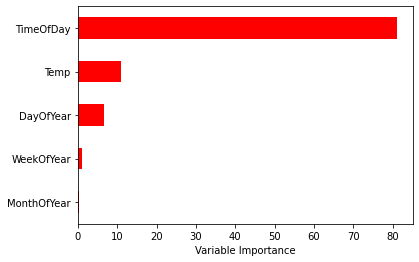

In [18]:
Importance.sort_values(by = 'Importance', 
                       axis = 0, 
                       ascending = True).plot(kind = 'barh', 
                                              color = 'r', )
plt.xlabel('Variable Importance')
plt.gca().legend_ = None

In [19]:

X = df[['DayOfYear',"TimeOfDay","Temp"]]
y = df.iloc[:,2:3]
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)
gbm_model = GradientBoostingRegressor().fit(X_train, y_train)
y_pred = gbm_model.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

0.23524972470655597

In [20]:
gbm_model = GradientBoostingRegressor().fit(X_train, y_train)
gbm_params = {"learning_rate": [0.001,0.1,0.01],
             "max_depth": [3,5,8],
             "n_estimators": [100,200,500],
             "subsample": [1,0.5,0.8],
             "loss": ["ls","lad","quantile"]}
gbm_model = GradientBoostingRegressor().fit(X_train, y_train)

In [ ]:
gbm_cv_model = GridSearchCV(gbm_model, 
                            gbm_params, 
                            cv = 10, 
                            verbose = 2).fit(X_train, y_train)

Fitting 10 folds for each of 243 candidates, totalling 2430 fits
[CV] learning_rate=0.001, loss=ls, max_depth=3, n_estimators=100, subsample=1 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  learning_rate=0.001, loss=ls, max_depth=3, n_estimators=100, subsample=1, total=   0.4s
[CV] learning_rate=0.001, loss=ls, max_depth=3, n_estimators=100, subsample=1 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s


[CV]  learning_rate=0.001, loss=ls, max_depth=3, n_estimators=100, subsample=1, total=   0.3s
[CV] learning_rate=0.001, loss=ls, max_depth=3, n_estimators=100, subsample=1 
[CV]  learning_rate=0.001, loss=ls, max_depth=3, n_estimators=100, subsample=1, total=   0.4s
[CV] learning_rate=0.001, loss=ls, max_depth=3, n_estimators=100, subsample=1 
[CV]  learning_rate=0.001, loss=ls, max_depth=3, n_estimators=100, subsample=1, total=   0.4s
[CV] learning_rate=0.001, loss=ls, max_depth=3, n_estimators=100, subsample=1 
[CV]  learning_rate=0.001, loss=ls, max_depth=3, n_estimators=100, subsample=1, total=   0.3s
[CV] learning_rate=0.001, loss=ls, max_depth=3, n_estimators=100, subsample=1 
[CV]  learning_rate=0.001, loss=ls, max_depth=3, n_estimators=100, subsample=1, total=   0.4s
[CV] learning_rate=0.001, loss=ls, max_depth=3, n_estimators=100, subsample=1 
[CV]  learning_rate=0.001, loss=ls, max_depth=3, n_estimators=100, subsample=1, total=   0.4s
[CV] learning_rate=0.001, loss=ls, max_de

[CV]  learning_rate=0.001, loss=ls, max_depth=3, n_estimators=200, subsample=0.5, total=   0.5s
[CV] learning_rate=0.001, loss=ls, max_depth=3, n_estimators=200, subsample=0.5 
[CV]  learning_rate=0.001, loss=ls, max_depth=3, n_estimators=200, subsample=0.5, total=   0.5s
[CV] learning_rate=0.001, loss=ls, max_depth=3, n_estimators=200, subsample=0.8 
[CV]  learning_rate=0.001, loss=ls, max_depth=3, n_estimators=200, subsample=0.8, total=   0.7s
[CV] learning_rate=0.001, loss=ls, max_depth=3, n_estimators=200, subsample=0.8 
[CV]  learning_rate=0.001, loss=ls, max_depth=3, n_estimators=200, subsample=0.8, total=   0.7s
[CV] learning_rate=0.001, loss=ls, max_depth=3, n_estimators=200, subsample=0.8 
[CV]  learning_rate=0.001, loss=ls, max_depth=3, n_estimators=200, subsample=0.8, total=   0.6s
[CV] learning_rate=0.001, loss=ls, max_depth=3, n_estimators=200, subsample=0.8 
[CV]  learning_rate=0.001, loss=ls, max_depth=3, n_estimators=200, subsample=0.8, total=   0.7s
[CV] learning_rate=

[CV]  learning_rate=0.001, loss=ls, max_depth=5, n_estimators=100, subsample=1, total=   0.5s
[CV] learning_rate=0.001, loss=ls, max_depth=5, n_estimators=100, subsample=1 
[CV]  learning_rate=0.001, loss=ls, max_depth=5, n_estimators=100, subsample=1, total=   0.5s
[CV] learning_rate=0.001, loss=ls, max_depth=5, n_estimators=100, subsample=1 
[CV]  learning_rate=0.001, loss=ls, max_depth=5, n_estimators=100, subsample=1, total=   0.5s
[CV] learning_rate=0.001, loss=ls, max_depth=5, n_estimators=100, subsample=1 
[CV]  learning_rate=0.001, loss=ls, max_depth=5, n_estimators=100, subsample=1, total=   0.5s
[CV] learning_rate=0.001, loss=ls, max_depth=5, n_estimators=100, subsample=1 
[CV]  learning_rate=0.001, loss=ls, max_depth=5, n_estimators=100, subsample=1, total=   0.5s
[CV] learning_rate=0.001, loss=ls, max_depth=5, n_estimators=100, subsample=0.5 
[CV]  learning_rate=0.001, loss=ls, max_depth=5, n_estimators=100, subsample=0.5, total=   0.3s
[CV] learning_rate=0.001, loss=ls, ma

[CV]  learning_rate=0.001, loss=ls, max_depth=5, n_estimators=200, subsample=0.8, total=   1.0s
[CV] learning_rate=0.001, loss=ls, max_depth=5, n_estimators=200, subsample=0.8 
[CV]  learning_rate=0.001, loss=ls, max_depth=5, n_estimators=200, subsample=0.8, total=   1.0s
[CV] learning_rate=0.001, loss=ls, max_depth=5, n_estimators=200, subsample=0.8 
[CV]  learning_rate=0.001, loss=ls, max_depth=5, n_estimators=200, subsample=0.8, total=   0.9s
[CV] learning_rate=0.001, loss=ls, max_depth=5, n_estimators=200, subsample=0.8 
[CV]  learning_rate=0.001, loss=ls, max_depth=5, n_estimators=200, subsample=0.8, total=   1.0s
[CV] learning_rate=0.001, loss=ls, max_depth=5, n_estimators=200, subsample=0.8 
[CV]  learning_rate=0.001, loss=ls, max_depth=5, n_estimators=200, subsample=0.8, total=   1.0s
[CV] learning_rate=0.001, loss=ls, max_depth=5, n_estimators=200, subsample=0.8 
[CV]  learning_rate=0.001, loss=ls, max_depth=5, n_estimators=200, subsample=0.8, total=   1.0s
[CV] learning_rate=

[CV]  learning_rate=0.001, loss=ls, max_depth=8, n_estimators=100, subsample=1, total=   0.7s
[CV] learning_rate=0.001, loss=ls, max_depth=8, n_estimators=100, subsample=0.5 
[CV]  learning_rate=0.001, loss=ls, max_depth=8, n_estimators=100, subsample=0.5, total=   0.4s
[CV] learning_rate=0.001, loss=ls, max_depth=8, n_estimators=100, subsample=0.5 
[CV]  learning_rate=0.001, loss=ls, max_depth=8, n_estimators=100, subsample=0.5, total=   0.4s
[CV] learning_rate=0.001, loss=ls, max_depth=8, n_estimators=100, subsample=0.5 
[CV]  learning_rate=0.001, loss=ls, max_depth=8, n_estimators=100, subsample=0.5, total=   0.4s
[CV] learning_rate=0.001, loss=ls, max_depth=8, n_estimators=100, subsample=0.5 
[CV]  learning_rate=0.001, loss=ls, max_depth=8, n_estimators=100, subsample=0.5, total=   0.5s
[CV] learning_rate=0.001, loss=ls, max_depth=8, n_estimators=100, subsample=0.5 
[CV]  learning_rate=0.001, loss=ls, max_depth=8, n_estimators=100, subsample=0.5, total=   0.5s
[CV] learning_rate=0.

[CV]  learning_rate=0.001, loss=ls, max_depth=8, n_estimators=200, subsample=0.8, total=   1.3s
[CV] learning_rate=0.001, loss=ls, max_depth=8, n_estimators=200, subsample=0.8 
[CV]  learning_rate=0.001, loss=ls, max_depth=8, n_estimators=200, subsample=0.8, total=   1.4s
[CV] learning_rate=0.001, loss=ls, max_depth=8, n_estimators=200, subsample=0.8 
[CV]  learning_rate=0.001, loss=ls, max_depth=8, n_estimators=200, subsample=0.8, total=   1.5s
[CV] learning_rate=0.001, loss=ls, max_depth=8, n_estimators=200, subsample=0.8 
[CV]  learning_rate=0.001, loss=ls, max_depth=8, n_estimators=200, subsample=0.8, total=   1.3s
[CV] learning_rate=0.001, loss=ls, max_depth=8, n_estimators=500, subsample=1 
[CV]  learning_rate=0.001, loss=ls, max_depth=8, n_estimators=500, subsample=1, total=   3.3s
[CV] learning_rate=0.001, loss=ls, max_depth=8, n_estimators=500, subsample=1 
[CV]  learning_rate=0.001, loss=ls, max_depth=8, n_estimators=500, subsample=1, total=   3.7s
[CV] learning_rate=0.001, l

[CV]  learning_rate=0.001, loss=lad, max_depth=3, n_estimators=100, subsample=0.5, total=   0.3s
[CV] learning_rate=0.001, loss=lad, max_depth=3, n_estimators=100, subsample=0.5 
[CV]  learning_rate=0.001, loss=lad, max_depth=3, n_estimators=100, subsample=0.5, total=   0.3s
[CV] learning_rate=0.001, loss=lad, max_depth=3, n_estimators=100, subsample=0.5 
[CV]  learning_rate=0.001, loss=lad, max_depth=3, n_estimators=100, subsample=0.5, total=   0.3s
[CV] learning_rate=0.001, loss=lad, max_depth=3, n_estimators=100, subsample=0.5 
[CV]  learning_rate=0.001, loss=lad, max_depth=3, n_estimators=100, subsample=0.5, total=   0.3s
[CV] learning_rate=0.001, loss=lad, max_depth=3, n_estimators=100, subsample=0.5 
[CV]  learning_rate=0.001, loss=lad, max_depth=3, n_estimators=100, subsample=0.5, total=   0.3s
[CV] learning_rate=0.001, loss=lad, max_depth=3, n_estimators=100, subsample=0.5 
[CV]  learning_rate=0.001, loss=lad, max_depth=3, n_estimators=100, subsample=0.5, total=   0.3s
[CV] lea

[CV]  learning_rate=0.001, loss=lad, max_depth=3, n_estimators=200, subsample=0.8, total=   0.8s
[CV] learning_rate=0.001, loss=lad, max_depth=3, n_estimators=500, subsample=1 
[CV]  learning_rate=0.001, loss=lad, max_depth=3, n_estimators=500, subsample=1, total=   2.0s
[CV] learning_rate=0.001, loss=lad, max_depth=3, n_estimators=500, subsample=1 
[CV]  learning_rate=0.001, loss=lad, max_depth=3, n_estimators=500, subsample=1, total=   1.9s
[CV] learning_rate=0.001, loss=lad, max_depth=3, n_estimators=500, subsample=1 
[CV]  learning_rate=0.001, loss=lad, max_depth=3, n_estimators=500, subsample=1, total=   2.0s
[CV] learning_rate=0.001, loss=lad, max_depth=3, n_estimators=500, subsample=1 
[CV]  learning_rate=0.001, loss=lad, max_depth=3, n_estimators=500, subsample=1, total=   2.0s
[CV] learning_rate=0.001, loss=lad, max_depth=3, n_estimators=500, subsample=1 
[CV]  learning_rate=0.001, loss=lad, max_depth=3, n_estimators=500, subsample=1, total=   1.9s
[CV] learning_rate=0.001, lo

[CV]  learning_rate=0.001, loss=lad, max_depth=5, n_estimators=100, subsample=0.5, total=   0.4s
[CV] learning_rate=0.001, loss=lad, max_depth=5, n_estimators=100, subsample=0.5 
[CV]  learning_rate=0.001, loss=lad, max_depth=5, n_estimators=100, subsample=0.5, total=   0.4s
[CV] learning_rate=0.001, loss=lad, max_depth=5, n_estimators=100, subsample=0.5 
[CV]  learning_rate=0.001, loss=lad, max_depth=5, n_estimators=100, subsample=0.5, total=   0.4s
[CV] learning_rate=0.001, loss=lad, max_depth=5, n_estimators=100, subsample=0.5 
[CV]  learning_rate=0.001, loss=lad, max_depth=5, n_estimators=100, subsample=0.5, total=   0.4s
[CV] learning_rate=0.001, loss=lad, max_depth=5, n_estimators=100, subsample=0.8 
[CV]  learning_rate=0.001, loss=lad, max_depth=5, n_estimators=100, subsample=0.8, total=   0.5s
[CV] learning_rate=0.001, loss=lad, max_depth=5, n_estimators=100, subsample=0.8 
[CV]  learning_rate=0.001, loss=lad, max_depth=5, n_estimators=100, subsample=0.8, total=   0.5s
[CV] lea

[CV]  learning_rate=0.001, loss=lad, max_depth=5, n_estimators=500, subsample=1, total=   2.9s
[CV] learning_rate=0.001, loss=lad, max_depth=5, n_estimators=500, subsample=1 
[CV]  learning_rate=0.001, loss=lad, max_depth=5, n_estimators=500, subsample=1, total=   2.9s
[CV] learning_rate=0.001, loss=lad, max_depth=5, n_estimators=500, subsample=1 
[CV]  learning_rate=0.001, loss=lad, max_depth=5, n_estimators=500, subsample=1, total=   3.0s
[CV] learning_rate=0.001, loss=lad, max_depth=5, n_estimators=500, subsample=1 
[CV]  learning_rate=0.001, loss=lad, max_depth=5, n_estimators=500, subsample=1, total=   3.0s
[CV] learning_rate=0.001, loss=lad, max_depth=5, n_estimators=500, subsample=1 
[CV]  learning_rate=0.001, loss=lad, max_depth=5, n_estimators=500, subsample=1, total=   2.9s
[CV] learning_rate=0.001, loss=lad, max_depth=5, n_estimators=500, subsample=1 
[CV]  learning_rate=0.001, loss=lad, max_depth=5, n_estimators=500, subsample=1, total=   2.9s
[CV] learning_rate=0.001, loss

[CV]  learning_rate=0.001, loss=lad, max_depth=8, n_estimators=100, subsample=0.8, total=   1.0s
[CV] learning_rate=0.001, loss=lad, max_depth=8, n_estimators=100, subsample=0.8 
[CV]  learning_rate=0.001, loss=lad, max_depth=8, n_estimators=100, subsample=0.8, total=   1.0s
[CV] learning_rate=0.001, loss=lad, max_depth=8, n_estimators=100, subsample=0.8 
[CV]  learning_rate=0.001, loss=lad, max_depth=8, n_estimators=100, subsample=0.8, total=   1.0s
[CV] learning_rate=0.001, loss=lad, max_depth=8, n_estimators=100, subsample=0.8 
[CV]  learning_rate=0.001, loss=lad, max_depth=8, n_estimators=100, subsample=0.8, total=   1.0s
[CV] learning_rate=0.001, loss=lad, max_depth=8, n_estimators=100, subsample=0.8 
[CV]  learning_rate=0.001, loss=lad, max_depth=8, n_estimators=100, subsample=0.8, total=   1.0s
[CV] learning_rate=0.001, loss=lad, max_depth=8, n_estimators=100, subsample=0.8 
[CV]  learning_rate=0.001, loss=lad, max_depth=8, n_estimators=100, subsample=0.8, total=   1.0s
[CV] lea

[CV]  learning_rate=0.001, loss=lad, max_depth=8, n_estimators=500, subsample=1, total=   5.8s
[CV] learning_rate=0.001, loss=lad, max_depth=8, n_estimators=500, subsample=1 
[CV]  learning_rate=0.001, loss=lad, max_depth=8, n_estimators=500, subsample=1, total=   6.1s
[CV] learning_rate=0.001, loss=lad, max_depth=8, n_estimators=500, subsample=1 
[CV]  learning_rate=0.001, loss=lad, max_depth=8, n_estimators=500, subsample=1, total=   5.9s
[CV] learning_rate=0.001, loss=lad, max_depth=8, n_estimators=500, subsample=0.5 
[CV]  learning_rate=0.001, loss=lad, max_depth=8, n_estimators=500, subsample=0.5, total=   4.3s
[CV] learning_rate=0.001, loss=lad, max_depth=8, n_estimators=500, subsample=0.5 
[CV]  learning_rate=0.001, loss=lad, max_depth=8, n_estimators=500, subsample=0.5, total=   4.7s
[CV] learning_rate=0.001, loss=lad, max_depth=8, n_estimators=500, subsample=0.5 
[CV]  learning_rate=0.001, loss=lad, max_depth=8, n_estimators=500, subsample=0.5, total=   4.5s
[CV] learning_rate

[CV]  learning_rate=0.001, loss=quantile, max_depth=3, n_estimators=100, subsample=0.8, total=   0.5s
[CV] learning_rate=0.001, loss=quantile, max_depth=3, n_estimators=100, subsample=0.8 
[CV]  learning_rate=0.001, loss=quantile, max_depth=3, n_estimators=100, subsample=0.8, total=   0.5s
[CV] learning_rate=0.001, loss=quantile, max_depth=3, n_estimators=100, subsample=0.8 
[CV]  learning_rate=0.001, loss=quantile, max_depth=3, n_estimators=100, subsample=0.8, total=   0.5s
[CV] learning_rate=0.001, loss=quantile, max_depth=3, n_estimators=100, subsample=0.8 
[CV]  learning_rate=0.001, loss=quantile, max_depth=3, n_estimators=100, subsample=0.8, total=   0.5s
[CV] learning_rate=0.001, loss=quantile, max_depth=3, n_estimators=100, subsample=0.8 
[CV]  learning_rate=0.001, loss=quantile, max_depth=3, n_estimators=100, subsample=0.8, total=   0.5s
[CV] learning_rate=0.001, loss=quantile, max_depth=3, n_estimators=100, subsample=0.8 
[CV]  learning_rate=0.001, loss=quantile, max_depth=3, 

[CV]  learning_rate=0.001, loss=quantile, max_depth=3, n_estimators=500, subsample=1, total=   2.6s
[CV] learning_rate=0.001, loss=quantile, max_depth=3, n_estimators=500, subsample=1 
[CV]  learning_rate=0.001, loss=quantile, max_depth=3, n_estimators=500, subsample=1, total=   2.6s
[CV] learning_rate=0.001, loss=quantile, max_depth=3, n_estimators=500, subsample=1 
[CV]  learning_rate=0.001, loss=quantile, max_depth=3, n_estimators=500, subsample=1, total=   2.6s
[CV] learning_rate=0.001, loss=quantile, max_depth=3, n_estimators=500, subsample=1 
[CV]  learning_rate=0.001, loss=quantile, max_depth=3, n_estimators=500, subsample=1, total=   2.6s
[CV] learning_rate=0.001, loss=quantile, max_depth=3, n_estimators=500, subsample=0.5 
[CV]  learning_rate=0.001, loss=quantile, max_depth=3, n_estimators=500, subsample=0.5, total=   2.0s
[CV] learning_rate=0.001, loss=quantile, max_depth=3, n_estimators=500, subsample=0.5 
[CV]  learning_rate=0.001, loss=quantile, max_depth=3, n_estimators=5

[CV]  learning_rate=0.001, loss=quantile, max_depth=5, n_estimators=100, subsample=0.8, total=   0.8s
[CV] learning_rate=0.001, loss=quantile, max_depth=5, n_estimators=100, subsample=0.8 
[CV]  learning_rate=0.001, loss=quantile, max_depth=5, n_estimators=100, subsample=0.8, total=   0.8s
[CV] learning_rate=0.001, loss=quantile, max_depth=5, n_estimators=100, subsample=0.8 
[CV]  learning_rate=0.001, loss=quantile, max_depth=5, n_estimators=100, subsample=0.8, total=   0.8s
[CV] learning_rate=0.001, loss=quantile, max_depth=5, n_estimators=100, subsample=0.8 
[CV]  learning_rate=0.001, loss=quantile, max_depth=5, n_estimators=100, subsample=0.8, total=   0.8s
[CV] learning_rate=0.001, loss=quantile, max_depth=5, n_estimators=100, subsample=0.8 
[CV]  learning_rate=0.001, loss=quantile, max_depth=5, n_estimators=100, subsample=0.8, total=   0.7s
[CV] learning_rate=0.001, loss=quantile, max_depth=5, n_estimators=100, subsample=0.8 
[CV]  learning_rate=0.001, loss=quantile, max_depth=5, 

[CV]  learning_rate=0.001, loss=quantile, max_depth=5, n_estimators=500, subsample=1, total=   4.2s
[CV] learning_rate=0.001, loss=quantile, max_depth=5, n_estimators=500, subsample=1 
[CV]  learning_rate=0.001, loss=quantile, max_depth=5, n_estimators=500, subsample=1, total=   4.1s
[CV] learning_rate=0.001, loss=quantile, max_depth=5, n_estimators=500, subsample=1 
[CV]  learning_rate=0.001, loss=quantile, max_depth=5, n_estimators=500, subsample=1, total=   4.2s
[CV] learning_rate=0.001, loss=quantile, max_depth=5, n_estimators=500, subsample=1 
[CV]  learning_rate=0.001, loss=quantile, max_depth=5, n_estimators=500, subsample=1, total=   4.1s
[CV] learning_rate=0.001, loss=quantile, max_depth=5, n_estimators=500, subsample=1 
[CV]  learning_rate=0.001, loss=quantile, max_depth=5, n_estimators=500, subsample=1, total=   4.2s
[CV] learning_rate=0.001, loss=quantile, max_depth=5, n_estimators=500, subsample=1 
[CV]  learning_rate=0.001, loss=quantile, max_depth=5, n_estimators=500, su

[CV]  learning_rate=0.001, loss=quantile, max_depth=8, n_estimators=100, subsample=0.5, total=   1.1s
[CV] learning_rate=0.001, loss=quantile, max_depth=8, n_estimators=100, subsample=0.5 
[CV]  learning_rate=0.001, loss=quantile, max_depth=8, n_estimators=100, subsample=0.5, total=   1.2s
[CV] learning_rate=0.001, loss=quantile, max_depth=8, n_estimators=100, subsample=0.8 
[CV]  learning_rate=0.001, loss=quantile, max_depth=8, n_estimators=100, subsample=0.8, total=   1.4s
[CV] learning_rate=0.001, loss=quantile, max_depth=8, n_estimators=100, subsample=0.8 
[CV]  learning_rate=0.001, loss=quantile, max_depth=8, n_estimators=100, subsample=0.8, total=   1.4s
[CV] learning_rate=0.001, loss=quantile, max_depth=8, n_estimators=100, subsample=0.8 
[CV]  learning_rate=0.001, loss=quantile, max_depth=8, n_estimators=100, subsample=0.8, total=   1.4s
[CV] learning_rate=0.001, loss=quantile, max_depth=8, n_estimators=100, subsample=0.8 
[CV]  learning_rate=0.001, loss=quantile, max_depth=8, 

[CV]  learning_rate=0.001, loss=quantile, max_depth=8, n_estimators=500, subsample=1, total=   8.2s
[CV] learning_rate=0.001, loss=quantile, max_depth=8, n_estimators=500, subsample=1 
[CV]  learning_rate=0.001, loss=quantile, max_depth=8, n_estimators=500, subsample=1, total=   8.2s
[CV] learning_rate=0.001, loss=quantile, max_depth=8, n_estimators=500, subsample=1 
[CV]  learning_rate=0.001, loss=quantile, max_depth=8, n_estimators=500, subsample=1, total=   8.2s
[CV] learning_rate=0.001, loss=quantile, max_depth=8, n_estimators=500, subsample=1 
[CV]  learning_rate=0.001, loss=quantile, max_depth=8, n_estimators=500, subsample=1, total=   8.3s
[CV] learning_rate=0.001, loss=quantile, max_depth=8, n_estimators=500, subsample=1 
[CV]  learning_rate=0.001, loss=quantile, max_depth=8, n_estimators=500, subsample=1, total=   8.2s
[CV] learning_rate=0.001, loss=quantile, max_depth=8, n_estimators=500, subsample=1 
[CV]  learning_rate=0.001, loss=quantile, max_depth=8, n_estimators=500, su

[CV]  learning_rate=0.1, loss=ls, max_depth=3, n_estimators=100, subsample=0.5, total=   0.2s
[CV] learning_rate=0.1, loss=ls, max_depth=3, n_estimators=100, subsample=0.5 
[CV]  learning_rate=0.1, loss=ls, max_depth=3, n_estimators=100, subsample=0.5, total=   0.2s
[CV] learning_rate=0.1, loss=ls, max_depth=3, n_estimators=100, subsample=0.8 
[CV]  learning_rate=0.1, loss=ls, max_depth=3, n_estimators=100, subsample=0.8, total=   0.4s
[CV] learning_rate=0.1, loss=ls, max_depth=3, n_estimators=100, subsample=0.8 
[CV]  learning_rate=0.1, loss=ls, max_depth=3, n_estimators=100, subsample=0.8, total=   0.4s
[CV] learning_rate=0.1, loss=ls, max_depth=3, n_estimators=100, subsample=0.8 
[CV]  learning_rate=0.1, loss=ls, max_depth=3, n_estimators=100, subsample=0.8, total=   0.4s
[CV] learning_rate=0.1, loss=ls, max_depth=3, n_estimators=100, subsample=0.8 
[CV]  learning_rate=0.1, loss=ls, max_depth=3, n_estimators=100, subsample=0.8, total=   0.3s
[CV] learning_rate=0.1, loss=ls, max_dept

[CV]  learning_rate=0.1, loss=ls, max_depth=3, n_estimators=500, subsample=1, total=   1.8s
[CV] learning_rate=0.1, loss=ls, max_depth=3, n_estimators=500, subsample=1 
[CV]  learning_rate=0.1, loss=ls, max_depth=3, n_estimators=500, subsample=1, total=   1.8s
[CV] learning_rate=0.1, loss=ls, max_depth=3, n_estimators=500, subsample=1 
[CV]  learning_rate=0.1, loss=ls, max_depth=3, n_estimators=500, subsample=1, total=   1.6s
[CV] learning_rate=0.1, loss=ls, max_depth=3, n_estimators=500, subsample=1 
[CV]  learning_rate=0.1, loss=ls, max_depth=3, n_estimators=500, subsample=1, total=   1.7s
[CV] learning_rate=0.1, loss=ls, max_depth=3, n_estimators=500, subsample=0.5 
[CV]  learning_rate=0.1, loss=ls, max_depth=3, n_estimators=500, subsample=0.5, total=   1.5s
[CV] learning_rate=0.1, loss=ls, max_depth=3, n_estimators=500, subsample=0.5 
[CV]  learning_rate=0.1, loss=ls, max_depth=3, n_estimators=500, subsample=0.5, total=   1.3s
[CV] learning_rate=0.1, loss=ls, max_depth=3, n_estimat

[CV]  learning_rate=0.1, loss=ls, max_depth=5, n_estimators=100, subsample=0.8, total=   0.6s
[CV] learning_rate=0.1, loss=ls, max_depth=5, n_estimators=100, subsample=0.8 
[CV]  learning_rate=0.1, loss=ls, max_depth=5, n_estimators=100, subsample=0.8, total=   0.6s
[CV] learning_rate=0.1, loss=ls, max_depth=5, n_estimators=100, subsample=0.8 
[CV]  learning_rate=0.1, loss=ls, max_depth=5, n_estimators=100, subsample=0.8, total=   0.5s
[CV] learning_rate=0.1, loss=ls, max_depth=5, n_estimators=100, subsample=0.8 
[CV]  learning_rate=0.1, loss=ls, max_depth=5, n_estimators=100, subsample=0.8, total=   0.6s
[CV] learning_rate=0.1, loss=ls, max_depth=5, n_estimators=100, subsample=0.8 
[CV]  learning_rate=0.1, loss=ls, max_depth=5, n_estimators=100, subsample=0.8, total=   0.6s
[CV] learning_rate=0.1, loss=ls, max_depth=5, n_estimators=100, subsample=0.8 
[CV]  learning_rate=0.1, loss=ls, max_depth=5, n_estimators=100, subsample=0.8, total=   0.5s
[CV] learning_rate=0.1, loss=ls, max_dept

[CV]  learning_rate=0.1, loss=ls, max_depth=5, n_estimators=500, subsample=0.5, total=   1.8s
[CV] learning_rate=0.1, loss=ls, max_depth=5, n_estimators=500, subsample=0.5 
[CV]  learning_rate=0.1, loss=ls, max_depth=5, n_estimators=500, subsample=0.5, total=   1.8s
[CV] learning_rate=0.1, loss=ls, max_depth=5, n_estimators=500, subsample=0.5 
[CV]  learning_rate=0.1, loss=ls, max_depth=5, n_estimators=500, subsample=0.5, total=   1.8s
[CV] learning_rate=0.1, loss=ls, max_depth=5, n_estimators=500, subsample=0.5 
[CV]  learning_rate=0.1, loss=ls, max_depth=5, n_estimators=500, subsample=0.5, total=   1.9s
[CV] learning_rate=0.1, loss=ls, max_depth=5, n_estimators=500, subsample=0.5 
[CV]  learning_rate=0.1, loss=ls, max_depth=5, n_estimators=500, subsample=0.5, total=   1.8s
[CV] learning_rate=0.1, loss=ls, max_depth=5, n_estimators=500, subsample=0.5 
[CV]  learning_rate=0.1, loss=ls, max_depth=5, n_estimators=500, subsample=0.5, total=   1.7s
[CV] learning_rate=0.1, loss=ls, max_dept

[CV]  learning_rate=0.1, loss=ls, max_depth=8, n_estimators=200, subsample=1, total=   1.7s
[CV] learning_rate=0.1, loss=ls, max_depth=8, n_estimators=200, subsample=1 
[CV]  learning_rate=0.1, loss=ls, max_depth=8, n_estimators=200, subsample=1, total=   1.7s
[CV] learning_rate=0.1, loss=ls, max_depth=8, n_estimators=200, subsample=1 
[CV]  learning_rate=0.1, loss=ls, max_depth=8, n_estimators=200, subsample=1, total=   1.8s
[CV] learning_rate=0.1, loss=ls, max_depth=8, n_estimators=200, subsample=1 
[CV]  learning_rate=0.1, loss=ls, max_depth=8, n_estimators=200, subsample=1, total=   1.7s
[CV] learning_rate=0.1, loss=ls, max_depth=8, n_estimators=200, subsample=1 
[CV]  learning_rate=0.1, loss=ls, max_depth=8, n_estimators=200, subsample=1, total=   1.8s
[CV] learning_rate=0.1, loss=ls, max_depth=8, n_estimators=200, subsample=1 
[CV]  learning_rate=0.1, loss=ls, max_depth=8, n_estimators=200, subsample=1, total=   1.7s
[CV] learning_rate=0.1, loss=ls, max_depth=8, n_estimators=200,

[CV]  learning_rate=0.1, loss=ls, max_depth=8, n_estimators=500, subsample=0.5, total=   2.5s
[CV] learning_rate=0.1, loss=ls, max_depth=8, n_estimators=500, subsample=0.5 
[CV]  learning_rate=0.1, loss=ls, max_depth=8, n_estimators=500, subsample=0.5, total=   2.5s
[CV] learning_rate=0.1, loss=ls, max_depth=8, n_estimators=500, subsample=0.8 
[CV]  learning_rate=0.1, loss=ls, max_depth=8, n_estimators=500, subsample=0.8, total=   3.6s
[CV] learning_rate=0.1, loss=ls, max_depth=8, n_estimators=500, subsample=0.8 
[CV]  learning_rate=0.1, loss=ls, max_depth=8, n_estimators=500, subsample=0.8, total=   3.5s
[CV] learning_rate=0.1, loss=ls, max_depth=8, n_estimators=500, subsample=0.8 
[CV]  learning_rate=0.1, loss=ls, max_depth=8, n_estimators=500, subsample=0.8, total=   3.7s
[CV] learning_rate=0.1, loss=ls, max_depth=8, n_estimators=500, subsample=0.8 
[CV]  learning_rate=0.1, loss=ls, max_depth=8, n_estimators=500, subsample=0.8, total=   3.7s
[CV] learning_rate=0.1, loss=ls, max_dept

[CV]  learning_rate=0.1, loss=lad, max_depth=3, n_estimators=200, subsample=1, total=   0.8s
[CV] learning_rate=0.1, loss=lad, max_depth=3, n_estimators=200, subsample=1 
[CV]  learning_rate=0.1, loss=lad, max_depth=3, n_estimators=200, subsample=1, total=   0.8s
[CV] learning_rate=0.1, loss=lad, max_depth=3, n_estimators=200, subsample=1 
[CV]  learning_rate=0.1, loss=lad, max_depth=3, n_estimators=200, subsample=1, total=   0.8s
[CV] learning_rate=0.1, loss=lad, max_depth=3, n_estimators=200, subsample=1 
[CV]  learning_rate=0.1, loss=lad, max_depth=3, n_estimators=200, subsample=1, total=   0.8s
[CV] learning_rate=0.1, loss=lad, max_depth=3, n_estimators=200, subsample=0.5 
[CV]  learning_rate=0.1, loss=lad, max_depth=3, n_estimators=200, subsample=0.5, total=   0.6s
[CV] learning_rate=0.1, loss=lad, max_depth=3, n_estimators=200, subsample=0.5 
[CV]  learning_rate=0.1, loss=lad, max_depth=3, n_estimators=200, subsample=0.5, total=   0.6s
[CV] learning_rate=0.1, loss=lad, max_depth=

[CV]  learning_rate=0.1, loss=lad, max_depth=3, n_estimators=500, subsample=0.8, total=   1.8s
[CV] learning_rate=0.1, loss=lad, max_depth=3, n_estimators=500, subsample=0.8 
[CV]  learning_rate=0.1, loss=lad, max_depth=3, n_estimators=500, subsample=0.8, total=   2.0s
[CV] learning_rate=0.1, loss=lad, max_depth=3, n_estimators=500, subsample=0.8 
[CV]  learning_rate=0.1, loss=lad, max_depth=3, n_estimators=500, subsample=0.8, total=   2.0s
[CV] learning_rate=0.1, loss=lad, max_depth=3, n_estimators=500, subsample=0.8 
[CV]  learning_rate=0.1, loss=lad, max_depth=3, n_estimators=500, subsample=0.8, total=   1.8s
[CV] learning_rate=0.1, loss=lad, max_depth=3, n_estimators=500, subsample=0.8 
[CV]  learning_rate=0.1, loss=lad, max_depth=3, n_estimators=500, subsample=0.8, total=   2.0s
[CV] learning_rate=0.1, loss=lad, max_depth=3, n_estimators=500, subsample=0.8 
[CV]  learning_rate=0.1, loss=lad, max_depth=3, n_estimators=500, subsample=0.8, total=   1.9s
[CV] learning_rate=0.1, loss=l

[CV]  learning_rate=0.1, loss=lad, max_depth=5, n_estimators=200, subsample=0.5, total=   1.0s
[CV] learning_rate=0.1, loss=lad, max_depth=5, n_estimators=200, subsample=0.5 
[CV]  learning_rate=0.1, loss=lad, max_depth=5, n_estimators=200, subsample=0.5, total=   1.0s
[CV] learning_rate=0.1, loss=lad, max_depth=5, n_estimators=200, subsample=0.5 
[CV]  learning_rate=0.1, loss=lad, max_depth=5, n_estimators=200, subsample=0.5, total=   1.1s
[CV] learning_rate=0.1, loss=lad, max_depth=5, n_estimators=200, subsample=0.5 
[CV]  learning_rate=0.1, loss=lad, max_depth=5, n_estimators=200, subsample=0.5, total=   0.9s
[CV] learning_rate=0.1, loss=lad, max_depth=5, n_estimators=200, subsample=0.5 
[CV]  learning_rate=0.1, loss=lad, max_depth=5, n_estimators=200, subsample=0.5, total=   1.0s
[CV] learning_rate=0.1, loss=lad, max_depth=5, n_estimators=200, subsample=0.5 
[CV]  learning_rate=0.1, loss=lad, max_depth=5, n_estimators=200, subsample=0.5, total=   1.0s
[CV] learning_rate=0.1, loss=l

[CV]  learning_rate=0.1, loss=lad, max_depth=8, n_estimators=100, subsample=1, total=   1.1s
[CV] learning_rate=0.1, loss=lad, max_depth=8, n_estimators=100, subsample=1 
[CV]  learning_rate=0.1, loss=lad, max_depth=8, n_estimators=100, subsample=1, total=   1.2s
[CV] learning_rate=0.1, loss=lad, max_depth=8, n_estimators=100, subsample=1 
[CV]  learning_rate=0.1, loss=lad, max_depth=8, n_estimators=100, subsample=1, total=   1.2s
[CV] learning_rate=0.1, loss=lad, max_depth=8, n_estimators=100, subsample=1 
[CV]  learning_rate=0.1, loss=lad, max_depth=8, n_estimators=100, subsample=1, total=   1.2s
[CV] learning_rate=0.1, loss=lad, max_depth=8, n_estimators=100, subsample=1 
[CV]  learning_rate=0.1, loss=lad, max_depth=8, n_estimators=100, subsample=1, total=   1.2s
[CV] learning_rate=0.1, loss=lad, max_depth=8, n_estimators=100, subsample=1 
[CV]  learning_rate=0.1, loss=lad, max_depth=8, n_estimators=100, subsample=1, total=   1.1s
[CV] learning_rate=0.1, loss=lad, max_depth=8, n_est

[CV]  learning_rate=0.1, loss=lad, max_depth=8, n_estimators=200, subsample=0.5, total=   1.7s
[CV] learning_rate=0.1, loss=lad, max_depth=8, n_estimators=200, subsample=0.5 
[CV]  learning_rate=0.1, loss=lad, max_depth=8, n_estimators=200, subsample=0.5, total=   1.6s
[CV] learning_rate=0.1, loss=lad, max_depth=8, n_estimators=200, subsample=0.8 
[CV]  learning_rate=0.1, loss=lad, max_depth=8, n_estimators=200, subsample=0.8, total=   1.8s
[CV] learning_rate=0.1, loss=lad, max_depth=8, n_estimators=200, subsample=0.8 
[CV]  learning_rate=0.1, loss=lad, max_depth=8, n_estimators=200, subsample=0.8, total=   2.1s
[CV] learning_rate=0.1, loss=lad, max_depth=8, n_estimators=200, subsample=0.8 
[CV]  learning_rate=0.1, loss=lad, max_depth=8, n_estimators=200, subsample=0.8, total=   1.9s
[CV] learning_rate=0.1, loss=lad, max_depth=8, n_estimators=200, subsample=0.8 
[CV]  learning_rate=0.1, loss=lad, max_depth=8, n_estimators=200, subsample=0.8, total=   2.0s
[CV] learning_rate=0.1, loss=l

[CV]  learning_rate=0.1, loss=quantile, max_depth=3, n_estimators=100, subsample=1, total=   0.5s
[CV] learning_rate=0.1, loss=quantile, max_depth=3, n_estimators=100, subsample=1 
[CV]  learning_rate=0.1, loss=quantile, max_depth=3, n_estimators=100, subsample=1, total=   0.5s
[CV] learning_rate=0.1, loss=quantile, max_depth=3, n_estimators=100, subsample=1 
[CV]  learning_rate=0.1, loss=quantile, max_depth=3, n_estimators=100, subsample=1, total=   0.5s
[CV] learning_rate=0.1, loss=quantile, max_depth=3, n_estimators=100, subsample=1 
[CV]  learning_rate=0.1, loss=quantile, max_depth=3, n_estimators=100, subsample=1, total=   0.5s
[CV] learning_rate=0.1, loss=quantile, max_depth=3, n_estimators=100, subsample=1 
[CV]  learning_rate=0.1, loss=quantile, max_depth=3, n_estimators=100, subsample=1, total=   0.5s
[CV] learning_rate=0.1, loss=quantile, max_depth=3, n_estimators=100, subsample=0.5 
[CV]  learning_rate=0.1, loss=quantile, max_depth=3, n_estimators=100, subsample=0.5, total= 

[CV]  learning_rate=0.1, loss=quantile, max_depth=3, n_estimators=200, subsample=0.8, total=   1.0s
[CV] learning_rate=0.1, loss=quantile, max_depth=3, n_estimators=200, subsample=0.8 
[CV]  learning_rate=0.1, loss=quantile, max_depth=3, n_estimators=200, subsample=0.8, total=   0.9s
[CV] learning_rate=0.1, loss=quantile, max_depth=3, n_estimators=200, subsample=0.8 
[CV]  learning_rate=0.1, loss=quantile, max_depth=3, n_estimators=200, subsample=0.8, total=   1.0s
[CV] learning_rate=0.1, loss=quantile, max_depth=3, n_estimators=200, subsample=0.8 
[CV]  learning_rate=0.1, loss=quantile, max_depth=3, n_estimators=200, subsample=0.8, total=   1.0s
[CV] learning_rate=0.1, loss=quantile, max_depth=3, n_estimators=200, subsample=0.8 
[CV]  learning_rate=0.1, loss=quantile, max_depth=3, n_estimators=200, subsample=0.8, total=   0.9s
[CV] learning_rate=0.1, loss=quantile, max_depth=3, n_estimators=200, subsample=0.8 
[CV]  learning_rate=0.1, loss=quantile, max_depth=3, n_estimators=200, subs

[CV]  learning_rate=0.1, loss=quantile, max_depth=5, n_estimators=100, subsample=1, total=   0.7s
[CV] learning_rate=0.1, loss=quantile, max_depth=5, n_estimators=100, subsample=1 
[CV]  learning_rate=0.1, loss=quantile, max_depth=5, n_estimators=100, subsample=1, total=   0.8s
[CV] learning_rate=0.1, loss=quantile, max_depth=5, n_estimators=100, subsample=1 
[CV]  learning_rate=0.1, loss=quantile, max_depth=5, n_estimators=100, subsample=1, total=   0.7s
[CV] learning_rate=0.1, loss=quantile, max_depth=5, n_estimators=100, subsample=1 
[CV]  learning_rate=0.1, loss=quantile, max_depth=5, n_estimators=100, subsample=1, total=   0.8s
[CV] learning_rate=0.1, loss=quantile, max_depth=5, n_estimators=100, subsample=1 
[CV]  learning_rate=0.1, loss=quantile, max_depth=5, n_estimators=100, subsample=1, total=   0.7s
[CV] learning_rate=0.1, loss=quantile, max_depth=5, n_estimators=100, subsample=0.5 
[CV]  learning_rate=0.1, loss=quantile, max_depth=5, n_estimators=100, subsample=0.5, total= 

[CV]  learning_rate=0.1, loss=quantile, max_depth=5, n_estimators=200, subsample=0.8, total=   1.6s
[CV] learning_rate=0.1, loss=quantile, max_depth=5, n_estimators=200, subsample=0.8 
[CV]  learning_rate=0.1, loss=quantile, max_depth=5, n_estimators=200, subsample=0.8, total=   1.5s
[CV] learning_rate=0.1, loss=quantile, max_depth=5, n_estimators=200, subsample=0.8 
[CV]  learning_rate=0.1, loss=quantile, max_depth=5, n_estimators=200, subsample=0.8, total=   1.7s
[CV] learning_rate=0.1, loss=quantile, max_depth=5, n_estimators=200, subsample=0.8 
[CV]  learning_rate=0.1, loss=quantile, max_depth=5, n_estimators=200, subsample=0.8, total=   1.6s
[CV] learning_rate=0.1, loss=quantile, max_depth=5, n_estimators=200, subsample=0.8 
[CV]  learning_rate=0.1, loss=quantile, max_depth=5, n_estimators=200, subsample=0.8, total=   1.8s
[CV] learning_rate=0.1, loss=quantile, max_depth=5, n_estimators=200, subsample=0.8 
[CV]  learning_rate=0.1, loss=quantile, max_depth=5, n_estimators=200, subs

[CV]  learning_rate=0.1, loss=quantile, max_depth=8, n_estimators=100, subsample=1, total=   1.7s
[CV] learning_rate=0.1, loss=quantile, max_depth=8, n_estimators=100, subsample=1 
[CV]  learning_rate=0.1, loss=quantile, max_depth=8, n_estimators=100, subsample=1, total=   1.7s
[CV] learning_rate=0.1, loss=quantile, max_depth=8, n_estimators=100, subsample=1 
[CV]  learning_rate=0.1, loss=quantile, max_depth=8, n_estimators=100, subsample=1, total=   1.5s
[CV] learning_rate=0.1, loss=quantile, max_depth=8, n_estimators=100, subsample=1 
[CV]  learning_rate=0.1, loss=quantile, max_depth=8, n_estimators=100, subsample=1, total=   1.5s
[CV] learning_rate=0.1, loss=quantile, max_depth=8, n_estimators=100, subsample=1 
[CV]  learning_rate=0.1, loss=quantile, max_depth=8, n_estimators=100, subsample=1, total=   1.6s
[CV] learning_rate=0.1, loss=quantile, max_depth=8, n_estimators=100, subsample=0.5 
[CV]  learning_rate=0.1, loss=quantile, max_depth=8, n_estimators=100, subsample=0.5, total= 

[CV]  learning_rate=0.1, loss=quantile, max_depth=8, n_estimators=200, subsample=0.8, total=   2.8s
[CV] learning_rate=0.1, loss=quantile, max_depth=8, n_estimators=200, subsample=0.8 
[CV]  learning_rate=0.1, loss=quantile, max_depth=8, n_estimators=200, subsample=0.8, total=   2.7s
[CV] learning_rate=0.1, loss=quantile, max_depth=8, n_estimators=200, subsample=0.8 
[CV]  learning_rate=0.1, loss=quantile, max_depth=8, n_estimators=200, subsample=0.8, total=   2.8s
[CV] learning_rate=0.1, loss=quantile, max_depth=8, n_estimators=200, subsample=0.8 
[CV]  learning_rate=0.1, loss=quantile, max_depth=8, n_estimators=200, subsample=0.8, total=   2.8s
[CV] learning_rate=0.1, loss=quantile, max_depth=8, n_estimators=200, subsample=0.8 
[CV]  learning_rate=0.1, loss=quantile, max_depth=8, n_estimators=200, subsample=0.8, total=   2.8s
[CV] learning_rate=0.1, loss=quantile, max_depth=8, n_estimators=200, subsample=0.8 
[CV]  learning_rate=0.1, loss=quantile, max_depth=8, n_estimators=200, subs

[CV]  learning_rate=0.01, loss=ls, max_depth=3, n_estimators=100, subsample=1, total=   0.3s
[CV] learning_rate=0.01, loss=ls, max_depth=3, n_estimators=100, subsample=1 
[CV]  learning_rate=0.01, loss=ls, max_depth=3, n_estimators=100, subsample=1, total=   0.3s
[CV] learning_rate=0.01, loss=ls, max_depth=3, n_estimators=100, subsample=1 
[CV]  learning_rate=0.01, loss=ls, max_depth=3, n_estimators=100, subsample=1, total=   0.3s
[CV] learning_rate=0.01, loss=ls, max_depth=3, n_estimators=100, subsample=1 
[CV]  learning_rate=0.01, loss=ls, max_depth=3, n_estimators=100, subsample=1, total=   0.3s
[CV] learning_rate=0.01, loss=ls, max_depth=3, n_estimators=100, subsample=1 
[CV]  learning_rate=0.01, loss=ls, max_depth=3, n_estimators=100, subsample=1, total=   0.3s
[CV] learning_rate=0.01, loss=ls, max_depth=3, n_estimators=100, subsample=0.5 
[CV]  learning_rate=0.01, loss=ls, max_depth=3, n_estimators=100, subsample=0.5, total=   0.2s
[CV] learning_rate=0.01, loss=ls, max_depth=3, n

[CV]  learning_rate=0.01, loss=ls, max_depth=3, n_estimators=200, subsample=0.8, total=   0.7s
[CV] learning_rate=0.01, loss=ls, max_depth=3, n_estimators=200, subsample=0.8 
[CV]  learning_rate=0.01, loss=ls, max_depth=3, n_estimators=200, subsample=0.8, total=   0.6s
[CV] learning_rate=0.01, loss=ls, max_depth=3, n_estimators=200, subsample=0.8 
[CV]  learning_rate=0.01, loss=ls, max_depth=3, n_estimators=200, subsample=0.8, total=   0.7s
[CV] learning_rate=0.01, loss=ls, max_depth=3, n_estimators=200, subsample=0.8 
[CV]  learning_rate=0.01, loss=ls, max_depth=3, n_estimators=200, subsample=0.8, total=   0.7s
[CV] learning_rate=0.01, loss=ls, max_depth=3, n_estimators=200, subsample=0.8 
[CV]  learning_rate=0.01, loss=ls, max_depth=3, n_estimators=200, subsample=0.8, total=   0.8s
[CV] learning_rate=0.01, loss=ls, max_depth=3, n_estimators=200, subsample=0.8 
[CV]  learning_rate=0.01, loss=ls, max_depth=3, n_estimators=200, subsample=0.8, total=   0.7s
[CV] learning_rate=0.01, loss=

[CV]  learning_rate=0.01, loss=ls, max_depth=5, n_estimators=100, subsample=0.5, total=   0.4s
[CV] learning_rate=0.01, loss=ls, max_depth=5, n_estimators=100, subsample=0.5 
[CV]  learning_rate=0.01, loss=ls, max_depth=5, n_estimators=100, subsample=0.5, total=   0.4s
[CV] learning_rate=0.01, loss=ls, max_depth=5, n_estimators=100, subsample=0.5 
[CV]  learning_rate=0.01, loss=ls, max_depth=5, n_estimators=100, subsample=0.5, total=   0.4s
[CV] learning_rate=0.01, loss=ls, max_depth=5, n_estimators=100, subsample=0.5 
[CV]  learning_rate=0.01, loss=ls, max_depth=5, n_estimators=100, subsample=0.5, total=   0.4s
[CV] learning_rate=0.01, loss=ls, max_depth=5, n_estimators=100, subsample=0.5 
[CV]  learning_rate=0.01, loss=ls, max_depth=5, n_estimators=100, subsample=0.5, total=   0.3s
[CV] learning_rate=0.01, loss=ls, max_depth=5, n_estimators=100, subsample=0.5 
[CV]  learning_rate=0.01, loss=ls, max_depth=5, n_estimators=100, subsample=0.5, total=   0.4s
[CV] learning_rate=0.01, loss=

[CV]  learning_rate=0.01, loss=ls, max_depth=5, n_estimators=200, subsample=0.8, total=   1.0s
[CV] learning_rate=0.01, loss=ls, max_depth=5, n_estimators=500, subsample=1 
[CV]  learning_rate=0.01, loss=ls, max_depth=5, n_estimators=500, subsample=1, total=   2.6s
[CV] learning_rate=0.01, loss=ls, max_depth=5, n_estimators=500, subsample=1 
[CV]  learning_rate=0.01, loss=ls, max_depth=5, n_estimators=500, subsample=1, total=   2.4s
[CV] learning_rate=0.01, loss=ls, max_depth=5, n_estimators=500, subsample=1 
[CV]  learning_rate=0.01, loss=ls, max_depth=5, n_estimators=500, subsample=1, total=   2.7s
[CV] learning_rate=0.01, loss=ls, max_depth=5, n_estimators=500, subsample=1 
[CV]  learning_rate=0.01, loss=ls, max_depth=5, n_estimators=500, subsample=1, total=   2.6s
[CV] learning_rate=0.01, loss=ls, max_depth=5, n_estimators=500, subsample=1 
[CV]  learning_rate=0.01, loss=ls, max_depth=5, n_estimators=500, subsample=1, total=   2.6s
[CV] learning_rate=0.01, loss=ls, max_depth=5, n_e

[CV]  learning_rate=0.01, loss=ls, max_depth=8, n_estimators=100, subsample=0.5, total=   0.4s
[CV] learning_rate=0.01, loss=ls, max_depth=8, n_estimators=100, subsample=0.5 
[CV]  learning_rate=0.01, loss=ls, max_depth=8, n_estimators=100, subsample=0.5, total=   0.4s
[CV] learning_rate=0.01, loss=ls, max_depth=8, n_estimators=100, subsample=0.5 
[CV]  learning_rate=0.01, loss=ls, max_depth=8, n_estimators=100, subsample=0.5, total=   0.5s
[CV] learning_rate=0.01, loss=ls, max_depth=8, n_estimators=100, subsample=0.8 
[CV]  learning_rate=0.01, loss=ls, max_depth=8, n_estimators=100, subsample=0.8, total=   0.6s
[CV] learning_rate=0.01, loss=ls, max_depth=8, n_estimators=100, subsample=0.8 
[CV]  learning_rate=0.01, loss=ls, max_depth=8, n_estimators=100, subsample=0.8, total=   0.6s
[CV] learning_rate=0.01, loss=ls, max_depth=8, n_estimators=100, subsample=0.8 
[CV]  learning_rate=0.01, loss=ls, max_depth=8, n_estimators=100, subsample=0.8, total=   0.7s
[CV] learning_rate=0.01, loss=

[CV]  learning_rate=0.01, loss=ls, max_depth=8, n_estimators=500, subsample=1, total=   3.7s
[CV] learning_rate=0.01, loss=ls, max_depth=8, n_estimators=500, subsample=1 
[CV]  learning_rate=0.01, loss=ls, max_depth=8, n_estimators=500, subsample=1, total=   3.8s
[CV] learning_rate=0.01, loss=ls, max_depth=8, n_estimators=500, subsample=1 
[CV]  learning_rate=0.01, loss=ls, max_depth=8, n_estimators=500, subsample=1, total=   3.5s
[CV] learning_rate=0.01, loss=ls, max_depth=8, n_estimators=500, subsample=1 
[CV]  learning_rate=0.01, loss=ls, max_depth=8, n_estimators=500, subsample=1, total=   3.6s
[CV] learning_rate=0.01, loss=ls, max_depth=8, n_estimators=500, subsample=1 
[CV]  learning_rate=0.01, loss=ls, max_depth=8, n_estimators=500, subsample=1, total=   3.7s
[CV] learning_rate=0.01, loss=ls, max_depth=8, n_estimators=500, subsample=0.5 
[CV]  learning_rate=0.01, loss=ls, max_depth=8, n_estimators=500, subsample=0.5, total=   2.3s
[CV] learning_rate=0.01, loss=ls, max_depth=8, n

[CV]  learning_rate=0.01, loss=lad, max_depth=3, n_estimators=100, subsample=0.8, total=   0.4s
[CV] learning_rate=0.01, loss=lad, max_depth=3, n_estimators=100, subsample=0.8 
[CV]  learning_rate=0.01, loss=lad, max_depth=3, n_estimators=100, subsample=0.8, total=   0.4s
[CV] learning_rate=0.01, loss=lad, max_depth=3, n_estimators=100, subsample=0.8 
[CV]  learning_rate=0.01, loss=lad, max_depth=3, n_estimators=100, subsample=0.8, total=   0.4s
[CV] learning_rate=0.01, loss=lad, max_depth=3, n_estimators=100, subsample=0.8 
[CV]  learning_rate=0.01, loss=lad, max_depth=3, n_estimators=100, subsample=0.8, total=   0.4s
[CV] learning_rate=0.01, loss=lad, max_depth=3, n_estimators=100, subsample=0.8 
[CV]  learning_rate=0.01, loss=lad, max_depth=3, n_estimators=100, subsample=0.8, total=   0.4s
[CV] learning_rate=0.01, loss=lad, max_depth=3, n_estimators=100, subsample=0.8 
[CV]  learning_rate=0.01, loss=lad, max_depth=3, n_estimators=100, subsample=0.8, total=   0.4s
[CV] learning_rate=

[CV]  learning_rate=0.01, loss=lad, max_depth=3, n_estimators=500, subsample=1, total=   2.0s
[CV] learning_rate=0.01, loss=lad, max_depth=3, n_estimators=500, subsample=0.5 
[CV]  learning_rate=0.01, loss=lad, max_depth=3, n_estimators=500, subsample=0.5, total=   1.4s
[CV] learning_rate=0.01, loss=lad, max_depth=3, n_estimators=500, subsample=0.5 
[CV]  learning_rate=0.01, loss=lad, max_depth=3, n_estimators=500, subsample=0.5, total=   1.5s
[CV] learning_rate=0.01, loss=lad, max_depth=3, n_estimators=500, subsample=0.5 
[CV]  learning_rate=0.01, loss=lad, max_depth=3, n_estimators=500, subsample=0.5, total=   1.5s
[CV] learning_rate=0.01, loss=lad, max_depth=3, n_estimators=500, subsample=0.5 
[CV]  learning_rate=0.01, loss=lad, max_depth=3, n_estimators=500, subsample=0.5, total=   1.5s
[CV] learning_rate=0.01, loss=lad, max_depth=3, n_estimators=500, subsample=0.5 
[CV]  learning_rate=0.01, loss=lad, max_depth=3, n_estimators=500, subsample=0.5, total=   1.5s
[CV] learning_rate=0.

[CV]  learning_rate=0.01, loss=lad, max_depth=5, n_estimators=100, subsample=0.8, total=   0.6s
[CV] learning_rate=0.01, loss=lad, max_depth=5, n_estimators=100, subsample=0.8 
[CV]  learning_rate=0.01, loss=lad, max_depth=5, n_estimators=100, subsample=0.8, total=   0.6s
[CV] learning_rate=0.01, loss=lad, max_depth=5, n_estimators=100, subsample=0.8 
[CV]  learning_rate=0.01, loss=lad, max_depth=5, n_estimators=100, subsample=0.8, total=   0.6s
[CV] learning_rate=0.01, loss=lad, max_depth=5, n_estimators=100, subsample=0.8 
[CV]  learning_rate=0.01, loss=lad, max_depth=5, n_estimators=100, subsample=0.8, total=   0.6s
[CV] learning_rate=0.01, loss=lad, max_depth=5, n_estimators=200, subsample=1 
[CV]  learning_rate=0.01, loss=lad, max_depth=5, n_estimators=200, subsample=1, total=   1.2s
[CV] learning_rate=0.01, loss=lad, max_depth=5, n_estimators=200, subsample=1 
[CV]  learning_rate=0.01, loss=lad, max_depth=5, n_estimators=200, subsample=1, total=   1.3s
[CV] learning_rate=0.01, lo

[CV]  learning_rate=0.01, loss=lad, max_depth=5, n_estimators=500, subsample=0.5, total=   2.3s
[CV] learning_rate=0.01, loss=lad, max_depth=5, n_estimators=500, subsample=0.5 
[CV]  learning_rate=0.01, loss=lad, max_depth=5, n_estimators=500, subsample=0.5, total=   2.2s
[CV] learning_rate=0.01, loss=lad, max_depth=5, n_estimators=500, subsample=0.5 
[CV]  learning_rate=0.01, loss=lad, max_depth=5, n_estimators=500, subsample=0.5, total=   2.2s
[CV] learning_rate=0.01, loss=lad, max_depth=5, n_estimators=500, subsample=0.5 
[CV]  learning_rate=0.01, loss=lad, max_depth=5, n_estimators=500, subsample=0.5, total=   2.2s
[CV] learning_rate=0.01, loss=lad, max_depth=5, n_estimators=500, subsample=0.5 
[CV]  learning_rate=0.01, loss=lad, max_depth=5, n_estimators=500, subsample=0.5, total=   2.3s
[CV] learning_rate=0.01, loss=lad, max_depth=5, n_estimators=500, subsample=0.5 
[CV]  learning_rate=0.01, loss=lad, max_depth=5, n_estimators=500, subsample=0.5, total=   2.3s
[CV] learning_rate=

[CV]  learning_rate=0.01, loss=lad, max_depth=8, n_estimators=200, subsample=1, total=   2.4s
[CV] learning_rate=0.01, loss=lad, max_depth=8, n_estimators=200, subsample=1 
[CV]  learning_rate=0.01, loss=lad, max_depth=8, n_estimators=200, subsample=1, total=   2.6s
[CV] learning_rate=0.01, loss=lad, max_depth=8, n_estimators=200, subsample=1 
[CV]  learning_rate=0.01, loss=lad, max_depth=8, n_estimators=200, subsample=1, total=   2.4s
[CV] learning_rate=0.01, loss=lad, max_depth=8, n_estimators=200, subsample=1 
[CV]  learning_rate=0.01, loss=lad, max_depth=8, n_estimators=200, subsample=1, total=   2.4s
[CV] learning_rate=0.01, loss=lad, max_depth=8, n_estimators=200, subsample=1 
[CV]  learning_rate=0.01, loss=lad, max_depth=8, n_estimators=200, subsample=1, total=   2.5s
[CV] learning_rate=0.01, loss=lad, max_depth=8, n_estimators=200, subsample=1 
[CV]  learning_rate=0.01, loss=lad, max_depth=8, n_estimators=200, subsample=1, total=   2.5s
[CV] learning_rate=0.01, loss=lad, max_de

[CV]  learning_rate=0.01, loss=lad, max_depth=8, n_estimators=500, subsample=0.5, total=   4.8s
[CV] learning_rate=0.01, loss=lad, max_depth=8, n_estimators=500, subsample=0.5 
[CV]  learning_rate=0.01, loss=lad, max_depth=8, n_estimators=500, subsample=0.5, total=   4.5s
[CV] learning_rate=0.01, loss=lad, max_depth=8, n_estimators=500, subsample=0.5 
[CV]  learning_rate=0.01, loss=lad, max_depth=8, n_estimators=500, subsample=0.5, total=   4.6s
[CV] learning_rate=0.01, loss=lad, max_depth=8, n_estimators=500, subsample=0.8 
[CV]  learning_rate=0.01, loss=lad, max_depth=8, n_estimators=500, subsample=0.8, total=   5.5s
[CV] learning_rate=0.01, loss=lad, max_depth=8, n_estimators=500, subsample=0.8 
[CV]  learning_rate=0.01, loss=lad, max_depth=8, n_estimators=500, subsample=0.8, total=   5.5s
[CV] learning_rate=0.01, loss=lad, max_depth=8, n_estimators=500, subsample=0.8 
[CV]  learning_rate=0.01, loss=lad, max_depth=8, n_estimators=500, subsample=0.8, total=   5.5s
[CV] learning_rate=

[CV]  learning_rate=0.01, loss=quantile, max_depth=3, n_estimators=200, subsample=1, total=   1.3s
[CV] learning_rate=0.01, loss=quantile, max_depth=3, n_estimators=200, subsample=1 
[CV]  learning_rate=0.01, loss=quantile, max_depth=3, n_estimators=200, subsample=1, total=   1.2s
[CV] learning_rate=0.01, loss=quantile, max_depth=3, n_estimators=200, subsample=1 
[CV]  learning_rate=0.01, loss=quantile, max_depth=3, n_estimators=200, subsample=1, total=   1.2s
[CV] learning_rate=0.01, loss=quantile, max_depth=3, n_estimators=200, subsample=1 
[CV]  learning_rate=0.01, loss=quantile, max_depth=3, n_estimators=200, subsample=1, total=   1.0s
[CV] learning_rate=0.01, loss=quantile, max_depth=3, n_estimators=200, subsample=1 
[CV]  learning_rate=0.01, loss=quantile, max_depth=3, n_estimators=200, subsample=1, total=   1.0s
[CV] learning_rate=0.01, loss=quantile, max_depth=3, n_estimators=200, subsample=1 
[CV]  learning_rate=0.01, loss=quantile, max_depth=3, n_estimators=200, subsample=1, 

[CV]  learning_rate=0.01, loss=quantile, max_depth=3, n_estimators=500, subsample=0.5, total=   1.8s
[CV] learning_rate=0.01, loss=quantile, max_depth=3, n_estimators=500, subsample=0.5 
[CV]  learning_rate=0.01, loss=quantile, max_depth=3, n_estimators=500, subsample=0.5, total=   1.7s
[CV] learning_rate=0.01, loss=quantile, max_depth=3, n_estimators=500, subsample=0.5 
[CV]  learning_rate=0.01, loss=quantile, max_depth=3, n_estimators=500, subsample=0.5, total=   1.9s
[CV] learning_rate=0.01, loss=quantile, max_depth=3, n_estimators=500, subsample=0.8 
[CV]  learning_rate=0.01, loss=quantile, max_depth=3, n_estimators=500, subsample=0.8, total=   2.4s
[CV] learning_rate=0.01, loss=quantile, max_depth=3, n_estimators=500, subsample=0.8 
[CV]  learning_rate=0.01, loss=quantile, max_depth=3, n_estimators=500, subsample=0.8, total=   2.2s
[CV] learning_rate=0.01, loss=quantile, max_depth=3, n_estimators=500, subsample=0.8 
[CV]  learning_rate=0.01, loss=quantile, max_depth=3, n_estimator

[CV]  learning_rate=0.01, loss=quantile, max_depth=5, n_estimators=200, subsample=1, total=   1.6s
[CV] learning_rate=0.01, loss=quantile, max_depth=5, n_estimators=200, subsample=1 
[CV]  learning_rate=0.01, loss=quantile, max_depth=5, n_estimators=200, subsample=1, total=   1.7s
[CV] learning_rate=0.01, loss=quantile, max_depth=5, n_estimators=200, subsample=1 
[CV]  learning_rate=0.01, loss=quantile, max_depth=5, n_estimators=200, subsample=1, total=   1.9s
[CV] learning_rate=0.01, loss=quantile, max_depth=5, n_estimators=200, subsample=1 
[CV]  learning_rate=0.01, loss=quantile, max_depth=5, n_estimators=200, subsample=1, total=   1.6s
[CV] learning_rate=0.01, loss=quantile, max_depth=5, n_estimators=200, subsample=1 
[CV]  learning_rate=0.01, loss=quantile, max_depth=5, n_estimators=200, subsample=1, total=   2.1s
[CV] learning_rate=0.01, loss=quantile, max_depth=5, n_estimators=200, subsample=1 
[CV]  learning_rate=0.01, loss=quantile, max_depth=5, n_estimators=200, subsample=1, 

[CV]  learning_rate=0.01, loss=quantile, max_depth=5, n_estimators=500, subsample=0.5, total=   2.5s
[CV] learning_rate=0.01, loss=quantile, max_depth=5, n_estimators=500, subsample=0.5 
[CV]  learning_rate=0.01, loss=quantile, max_depth=5, n_estimators=500, subsample=0.5, total=   2.6s
[CV] learning_rate=0.01, loss=quantile, max_depth=5, n_estimators=500, subsample=0.5 
[CV]  learning_rate=0.01, loss=quantile, max_depth=5, n_estimators=500, subsample=0.5, total=   2.7s
[CV] learning_rate=0.01, loss=quantile, max_depth=5, n_estimators=500, subsample=0.8 
[CV]  learning_rate=0.01, loss=quantile, max_depth=5, n_estimators=500, subsample=0.8, total=   4.0s
[CV] learning_rate=0.01, loss=quantile, max_depth=5, n_estimators=500, subsample=0.8 
[CV]  learning_rate=0.01, loss=quantile, max_depth=5, n_estimators=500, subsample=0.8, total=   3.7s
[CV] learning_rate=0.01, loss=quantile, max_depth=5, n_estimators=500, subsample=0.8 
[CV]  learning_rate=0.01, loss=quantile, max_depth=5, n_estimator

[CV]  learning_rate=0.01, loss=quantile, max_depth=8, n_estimators=200, subsample=1, total=   3.9s
[CV] learning_rate=0.01, loss=quantile, max_depth=8, n_estimators=200, subsample=1 
[CV]  learning_rate=0.01, loss=quantile, max_depth=8, n_estimators=200, subsample=1, total=   3.9s
[CV] learning_rate=0.01, loss=quantile, max_depth=8, n_estimators=200, subsample=1 
[CV]  learning_rate=0.01, loss=quantile, max_depth=8, n_estimators=200, subsample=1, total=   3.8s
[CV] learning_rate=0.01, loss=quantile, max_depth=8, n_estimators=200, subsample=1 
[CV]  learning_rate=0.01, loss=quantile, max_depth=8, n_estimators=200, subsample=1, total=   3.7s
[CV] learning_rate=0.01, loss=quantile, max_depth=8, n_estimators=200, subsample=1 
[CV]  learning_rate=0.01, loss=quantile, max_depth=8, n_estimators=200, subsample=1, total=   3.5s
[CV] learning_rate=0.01, loss=quantile, max_depth=8, n_estimators=200, subsample=1 
[CV]  learning_rate=0.01, loss=quantile, max_depth=8, n_estimators=200, subsample=1, 

In [ ]:
gbm_cv_model.best_params_

In [ ]:
gbm_tuned = GradientBoostingRegressor(learning_rate = 0.1,
                                     loss = "ls",
                                     max_depth = 8,
                                     n_estimators = 500,
                                     subsample = 0.8).fit(X_train, y_train)

In [ ]:
ypred=gbm_tuned.predict(X_test)
print("mse = ",np.sqrt(mean_squared_error(y_test,ypred)))
model=r2_score(y_test, y_pred)
print('r2 = {}'.format(model))

In [ ]:
df.index=df.iloc[:,0]
df.index = pd.to_datetime(df.index)
# Predicting for whole dataset
df['y_pred'] =  gbm_tuned.predict(df[['DayOfYear',"TimeOfDay","Temp"]])

In [ ]:
# Create Interactive Plot Using Bokeh
from bokeh.plotting import figure, output_notebook, show
from bokeh.models import Range1d
output_notebook() 

In [ ]:
p = figure(plot_width=800, 
           plot_height=400,
           title="PV Electricity Consumption Prediction",
           x_axis_label='Date and Time',
           y_axis_label='Electricity Consumption',
           x_axis_type="datetime")

In [ ]:
p.line(df.index, df['Power'], legend='Observed Electricity Consumption', line_width=1)
p.line(df.index, df['y_pred'], legend='Predicted Electricity Consumption', line_width=1, line_color="red")

In [ ]:
show(p, notebook_handle = True)